# **GROUP 10_BIG DATA GROUP ADDIGNMENT: UK Road Safety Data**

---


> *This notebook is a Explorary Data Analysis report and Data Preprocessing on the UK Road Safety Data*
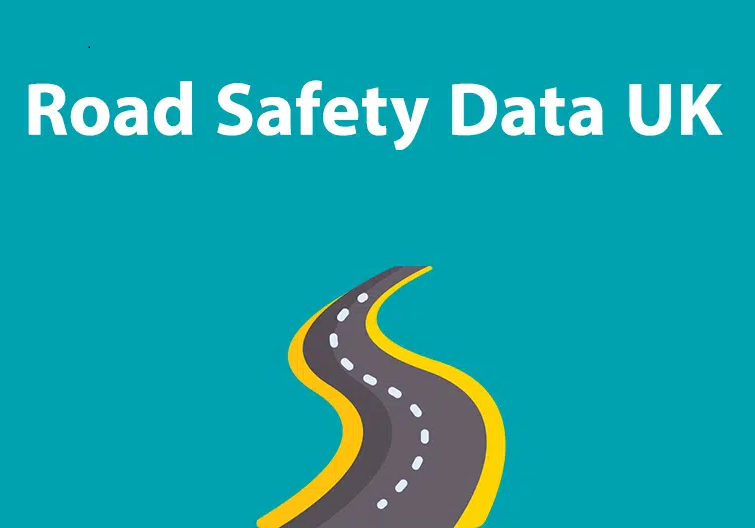






**Group 10 members:**

*   230041954
*   230264003
*   230084308
*  230325142







**TABLE OF CONTENTS:**
1.   Importing libraries
2.   Business Objective
3. Data Preparation
4. Train-test split
5. Descriptive Statistics and Exploratory Data Analysis
6. Data Preprocessing
7. Conclusion
8. Data Exporting



## **1. Importing libraries**

In [ ]:
# Import necessary libraries
# Base Libraries
import re
import time
import numpy as np
import pandas as pd

# Library for Google Colab
from google.colab import drive

# For data visualisation
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(palette="Set2")
#magic function for displaying plot in the notebook
%matplotlib inline

# silence warnings
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

# For Data Preprocessing and Cleaning

# Handle non-convergence alerts
from sklearn.exceptions import ConvergenceWarning
# Stratified train/test splits in scikit-learn
from sklearn.model_selection import StratifiedShuffleSplit

# Use train_test_split to split the data into a training and a test set
from sklearn.model_selection import train_test_split

"""Imports `OneHotEncoder` from scikit-learn for converting categorical variables
into a one-hot numerical representation"""
from sklearn.preprocessing import OneHotEncoder

# Imports scikit-learn classes for custom transformers
from sklearn.base import TransformerMixin, BaseEstimator

# Enable the experimental IterativeImputer module in scikit-learn
from sklearn.experimental import enable_iterative_imputer

# Import IterativeImputer and SimpleImputer classes from scikit-learn for imputing missing values
from sklearn.impute import IterativeImputer, SimpleImputer

# Import KNN Imputer class from scikit-learn for KNN Imputation
from sklearn.impute import KNNImputer

# Import the OutlierMixin class from the sklearn.base module
# for custom outlier detection classes
from sklearn.base import OutlierMixin

# Import IsolationForest to detect outliers
from sklearn.ensemble import IsolationForest

# Import  SelectKBest from sklearn.feature_selection module to select the top k features
from sklearn.feature_selection import SelectKBest

# Import the f_classif function from sklearn.feature_selection module
# Univariate feature selection technique used specifically for classification tasks
from sklearn.feature_selection import f_classif

# Import StandardScaler from sklearn.preprocessing module for standardize features
from sklearn.preprocessing import StandardScaler

In [ ]:
# Start time
start_time = time.time()

In [ ]:
# Mount Google Drive on kernel
drive.mount('/content/gdrive')
path = "/content/gdrive/My Drive"

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


## **2. Business Objective**






The business objective for the car insurance company is to build predictive models to effectively evaluate the severity of accidents individual drivers and casualties might be involved in, leveraging the context of UK road safety in 2022. This predictive analysis will enable the company to tailor insurance premiums according to individual risk profiles, guaranteeing  precise pricing that aligns with the potential costs of claims. The data contains factors related to casualties, drivers, vehicles, location and geographical factors.

## **3. Data Preparation**

***3.1. Loading Data***

In [ ]:
# Load Road Safety Data - Casualties 2022 dataset into a dataframe
casualty_df = pd.read_csv(
    '/content/gdrive/My Drive/Colab Notebooks/dft-road-casualty-statistics-casualty-2022.csv')

# Load Road Safety Data - Vehicle 2022 dataset into a dataframe
vehicle_df =  pd.read_csv(
    '/content/gdrive/My Drive/Colab Notebooks/dft-road-casualty-statistics-vehicle-2022.csv')

# Load Road Safety Data - Casualties 2022 dataset into a dataframe
collision_df =  pd.read_csv(
    '/content/gdrive/My Drive/Colab Notebooks/dft-road-casualty-statistics-collision-2022.csv')

<ipython-input-185-4f6a8ee3fc64>:2: DtypeWarning: Columns (0,2) have mixed types. Specify dtype option on import or set low_memory=False.
  casualty_df = pd.read_csv(
<ipython-input-185-4f6a8ee3fc64>:6: DtypeWarning: Columns (0,2) have mixed types. Specify dtype option on import or set low_memory=False.
  vehicle_df =  pd.read_csv(
<ipython-input-185-4f6a8ee3fc64>:10: DtypeWarning: Columns (0,2) have mixed types. Specify dtype option on import or set low_memory=False.
  collision_df =  pd.read_csv(


In [ ]:
# Display the first few rows of the Casualty DataFrame
casualty_df.head()

,accident_index,accident_year,accident_reference,vehicle_reference,casualty_reference,casualty_class,sex_of_casualty,age_of_casualty,age_band_of_casualty,casualty_severity,pedestrian_location,pedestrian_movement,car_passenger,bus_or_coach_passenger,pedestrian_road_maintenance_worker,casualty_type,casualty_home_area_type,casualty_imd_decile,lsoa_of_casualty
0,2022010352073,2022,10352073,2,1,1,1,17,4,3,0,0,0,0,0,3,1,1,E01001364
1,2022010352573,2022,10352573,1,1,1,2,42,7,3,0,0,0,0,0,9,1,5,E01000338
2,2022010352575,2022,10352575,1,1,1,1,20,4,3,0,0,0,0,0,9,1,8,E01000390
3,2022010352578,2022,10352578,1,1,1,1,46,8,3,0,0,0,0,0,9,1,3,E01004666
4,2022010352578,2022,10352578,1,2,2,1,45,7,3,0,0,1,0,0,9,1,3,E01004666


In [ ]:
# Get the number of rows and columns of Casualty dataframe
casualty_df.shape

(135480, 19)

The 'casualty_df' dataframe contains 135,480 rows and 19 columns.


In [ ]:
# Get information about the Casualty DataFrame
casualty_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135480 entries, 0 to 135479
Data columns (total 19 columns):
 #   Column                              Non-Null Count   Dtype 
---  ------                              --------------   ----- 
 0   accident_index                      135480 non-null  object
 1   accident_year                       135480 non-null  int64 
 2   accident_reference                  135480 non-null  object
 3   vehicle_reference                   135480 non-null  int64 
 4   casualty_reference                  135480 non-null  int64 
 5   casualty_class                      135480 non-null  int64 
 6   sex_of_casualty                     135480 non-null  int64 
 7   age_of_casualty                     135480 non-null  int64 
 8   age_band_of_casualty                135480 non-null  int64 
 9   casualty_severity                   135480 non-null  int64 
 10  pedestrian_location                 135480 non-null  int64 
 11  pedestrian_movement                 135

There are 135,480 entries and no missing observations.

In [ ]:
# Display the first few rows of the Vehicle DataFrame
vehicle_df.head()

,accident_index,accident_year,accident_reference,vehicle_reference,vehicle_type,towing_and_articulation,vehicle_manoeuvre,vehicle_direction_from,vehicle_direction_to,vehicle_location_restricted_lane,...,sex_of_driver,age_of_driver,age_band_of_driver,engine_capacity_cc,propulsion_code,age_of_vehicle,generic_make_model,driver_imd_decile,driver_home_area_type,lsoa_of_driver
0,2022010352073,2022,10352073,1,19,0,9,3,8,0,...,1,48,8,1461,2,4,RENAULT KANGOO,7,1,E01002687
1,2022010352073,2022,10352073,2,3,0,18,1,5,0,...,1,17,4,125,1,1,HONDA FSH125,1,1,E01001364
2,2022010352573,2022,10352573,1,9,0,18,7,3,0,...,2,42,7,-1,-1,-1,-1,5,1,E01000338
3,2022010352573,2022,10352573,2,9,0,13,7,3,0,...,3,-1,-1,-1,-1,-1,-1,-1,-1,-1
4,2022010352575,2022,10352575,1,9,0,18,4,8,0,...,1,20,4,1896,2,15,VOLKSWAGEN GOLF,8,1,E01000390


In [ ]:
# Get the number of rows and columns of Vehicle dataframe
vehicle_df.shape

(193545, 28)

The "vehicle_df" dataframe contain 193,545 rows and 28 columns.

In [ ]:
# Display the first few rows of the Vehicle DataFrame
vehicle_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193545 entries, 0 to 193544
Data columns (total 28 columns):
 #   Column                            Non-Null Count   Dtype 
---  ------                            --------------   ----- 
 0   accident_index                    193545 non-null  object
 1   accident_year                     193545 non-null  int64 
 2   accident_reference                193545 non-null  object
 3   vehicle_reference                 193545 non-null  int64 
 4   vehicle_type                      193545 non-null  int64 
 5   towing_and_articulation           193545 non-null  int64 
 6   vehicle_manoeuvre                 193545 non-null  int64 
 7   vehicle_direction_from            193545 non-null  int64 
 8   vehicle_direction_to              193545 non-null  int64 
 9   vehicle_location_restricted_lane  193545 non-null  int64 
 10  junction_location                 193545 non-null  int64 
 11  skidding_and_overturning          193545 non-null  int64 
 12  hi

There are 193545 entries and no missing observations.


In [ ]:
# Get the number of rows and columns of Collision dataframe
collision_df.shape

(106004, 36)

The "collision_df" dataframe contains 106,004 rows and 36 columns


In [ ]:
# Get information about the Collision DataFrame
collision_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106004 entries, 0 to 106003
Data columns (total 36 columns):
 #   Column                                       Non-Null Count   Dtype  
---  ------                                       --------------   -----  
 0   accident_index                               106004 non-null  object 
 1   accident_year                                106004 non-null  int64  
 2   accident_reference                           106004 non-null  object 
 3   location_easting_osgr                        105982 non-null  float64
 4   location_northing_osgr                       105982 non-null  float64
 5   longitude                                    105982 non-null  float64
 6   latitude                                     105982 non-null  float64
 7   police_force                                 106004 non-null  int64  
 8   accident_severity                            106004 non-null  int64  
 9   number_of_vehicles                           106004 non-nul

There are 106,004 entries and 22 missing observations in "location_easting_osgr","location_northing_osgr","longitude" and "latitude" columns.

In [ ]:
# Display the first few rows of the "collision_df" dataset
collision_df.head()

,accident_index,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,...,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location
0,2022010352073,2022,10352073,525199.0,177928.0,-0.198224,51.486454,1,3,2,...,0,4,1,1,0,0,1,1,2,E01001883
1,2022010352573,2022,10352573,546214.0,179866.0,0.105042,51.498830,1,3,2,...,4,4,1,1,0,0,2,1,2,E01033745
2,2022010352575,2022,10352575,551119.0,174789.0,0.173482,51.451924,1,3,2,...,0,4,1,1,0,0,1,1,2,E01000378
3,2022010352578,2022,10352578,528889.0,192230.0,-0.139873,51.614153,1,3,2,...,0,4,1,1,0,0,1,1,2,E01001529
4,2022010352580,2022,10352580,539773.0,190404.0,0.016495,51.595151,1,3,4,...,0,4,1,1,0,0,1,1,2,E01003673


### ***3.1.Handling unknown data/data missing***

**In these datasets, there are some columns that contain categorical information and have the value "-1", which suggests they are data missing or out of range/undefined.
Similarly, some values "9" and "99" suggest they are unknown. We replace them with the `np.NaN` symbol. This will make it easier for us to handle missing values. We'll ignore numerical variables in this matter.**

*- Handling "casualty_df" dataframe*

In [ ]:
# Print the columns which contain the value "-1" in the "casualty_df" dataframe
print("Columns that contain the value '-1':")
print(casualty_df.columns[(casualty_df == -1).any()])

Columns that contain the value '-1':
Index(['sex_of_casualty', 'age_of_casualty', 'age_band_of_casualty',
       'pedestrian_location', 'pedestrian_movement', 'car_passenger',
       'bus_or_coach_passenger', 'pedestrian_road_maintenance_worker',
       'casualty_type', 'casualty_home_area_type', 'casualty_imd_decile'],
      dtype='object')


In [ ]:
# Columns needed to replace '-1' with NaN in the "casualty_df" dataframe
casualtycolumns1_replace = [
   'sex_of_casualty', 'age_of_casualty', 'age_band_of_casualty',
       'pedestrian_location', 'pedestrian_movement', 'car_passenger',
       'bus_or_coach_passenger', 'pedestrian_road_maintenance_worker',
       'casualty_type', 'casualty_home_area_type', 'casualty_imd_decile'
]

# Replace -1 with np.NaN
casualty_df[casualtycolumns1_replace] = casualty_df[casualtycolumns1_replace].replace(-1, np.NaN)

In [ ]:
# Print the columns which contain the value "9" in the "casualty_df" dataframe
print("Columns that contain the value '9':")
print(casualty_df.columns[(casualty_df == 9).any()])

Columns that contain the value '9':
Index(['vehicle_reference', 'casualty_reference', 'sex_of_casualty',
       'age_of_casualty', 'age_band_of_casualty', 'pedestrian_location',
       'pedestrian_movement', 'car_passenger', 'bus_or_coach_passenger',
       'casualty_type', 'casualty_imd_decile'],
      dtype='object')


In [ ]:
# Exceptional columns:
# pedestrian_location = 9 (In carriageway, not crossing)
# casualty_type = 9 (Car occupant)

In [ ]:
# Columns needed to replace '9' with NaN in the "casualty_df" dataframe
casualtycolumns2_replace = ['sex_of_casualty',
                   'pedestrian_movement', 'car_passenger',
                    'bus_or_coach_passenger'
]

# Replace 9 with np.NaN
casualty_df[casualtycolumns2_replace] = casualty_df[casualtycolumns2_replace].replace(9, np.NaN)

In [ ]:
# Print the columns which contain the value "99" in the "casualty_df" dataframe
print("Columns that contain the value '99':")
print(casualty_df.columns[(casualty_df == 99).any()])

Columns that contain the value '99':
Index(['age_of_casualty', 'casualty_type'], dtype='object')


In [ ]:
# Replace 99 with np.NaN
casualty_df['casualty_type'] = casualty_df['casualty_type'].replace(99, np.NaN)

*- Handling "vehicle_df" dataframe*

In [ ]:
# Print the columns which contain the value "-1" in the "vehicle_df" dataframe
print("Columns that contain the value '-1':")
print(vehicle_df.columns[(vehicle_df == -1).any()])

Columns that contain the value '-1':
Index(['vehicle_type', 'towing_and_articulation', 'vehicle_manoeuvre',
       'vehicle_direction_from', 'vehicle_direction_to',
       'vehicle_location_restricted_lane', 'junction_location',
       'skidding_and_overturning', 'hit_object_in_carriageway',
       'vehicle_leaving_carriageway', 'hit_object_off_carriageway',
       'first_point_of_impact', 'age_of_driver', 'age_band_of_driver',
       'engine_capacity_cc', 'propulsion_code', 'age_of_vehicle',
       'driver_imd_decile', 'driver_home_area_type'],
      dtype='object')


In [ ]:
# Columns needed to replace '-1' with NaN in the "vehicle_df" dataframe
vehiclecolumns1_replace = [
    'vehicle_type', 'towing_and_articulation', 'vehicle_manoeuvre',
       'vehicle_direction_from', 'vehicle_direction_to',
       'vehicle_location_restricted_lane', 'junction_location',
       'skidding_and_overturning', 'hit_object_in_carriageway',
       'vehicle_leaving_carriageway', 'hit_object_off_carriageway',
       'first_point_of_impact', 'age_of_driver', 'age_band_of_driver',
       'engine_capacity_cc', 'propulsion_code', 'age_of_vehicle',
       'driver_imd_decile', 'driver_home_area_type'
]

# Replace -1 with np.NaN
vehicle_df[vehiclecolumns1_replace] = vehicle_df[vehiclecolumns1_replace].replace(-1, np.NaN)

In [ ]:
# Print the columns which contain the value "9" in the "vehicle_df" dataframe
print("Columns that contain the value '9':")
print(vehicle_df.columns[(vehicle_df == 9).any()])

Columns that contain the value '9':
Index(['vehicle_reference', 'vehicle_type', 'towing_and_articulation',
       'vehicle_manoeuvre', 'vehicle_direction_from', 'vehicle_direction_to',
       'vehicle_location_restricted_lane', 'junction_location',
       'skidding_and_overturning', 'hit_object_in_carriageway',
       'vehicle_leaving_carriageway', 'hit_object_off_carriageway',
       'first_point_of_impact', 'vehicle_left_hand_drive', 'age_of_driver',
       'age_band_of_driver', 'age_of_vehicle', 'driver_imd_decile'],
      dtype='object')


In [ ]:
# there are some exceptional columns where the value "9" represents other information:
# 'vehicle_type': 9- Car, 'vehicle_manoeuvre': 9-Turning right,
# 'vehicle_location_restricted_lane': 9- Footway (pavement), 'hit_object_in_carriageway': 9 -Entered ditch

In [ ]:
# Columns needed to replace '9' with NaN in the "vehicle_df" dataframe
vehiclecolumns2_replace = ['towing_and_articulation',
    'vehicle_direction_from', 'vehicle_direction_to',
       'junction_location',
       'skidding_and_overturning',
       'vehicle_leaving_carriageway',
       'first_point_of_impact', 'vehicle_left_hand_drive'
]

# Replace 9 with np.NaN
vehicle_df[vehiclecolumns2_replace] = vehicle_df[vehiclecolumns2_replace].replace(9, np.NaN)

In [ ]:
# Print the columns which contain the value "99" in the "vehicle_df" dataframe
print("Columns that contain the value '99':")
print(vehicle_df.columns[(vehicle_df == 99).any()])

Columns that contain the value '99':
Index(['vehicle_type', 'vehicle_manoeuvre', 'vehicle_location_restricted_lane',
       'hit_object_in_carriageway', 'hit_object_off_carriageway',
       'age_of_driver', 'age_of_vehicle'],
      dtype='object')


In [ ]:
# Columns needed to replace '99' with NaN in the "vehicle_df" dataframe
vehiclecolumns3_replace = ['vehicle_type', 'vehicle_manoeuvre',
                        'vehicle_location_restricted_lane',
       'hit_object_in_carriageway', 'hit_object_off_carriageway'
]

# Replace 99 with np.NaN
vehicle_df[vehiclecolumns3_replace] = vehicle_df[vehiclecolumns3_replace].replace(99, np.NaN)

In [ ]:
# In the column "sex_of_driver", value 3 represents unknown data
# Replace '3' with np.NaN in the "sex_of_driver" column
vehicle_df['sex_of_driver'] = vehicle_df['sex_of_driver'].replace(3, np.NaN)

*- Handling "collision_df" dataframe*

In [ ]:
# Print the columns which contain the value "-1" in the "collision_df" dataframe
print("Columns that contain the value '-1':")
print(collision_df.columns[(collision_df == -1).any()])

Columns that contain the value '-1':
Index(['local_authority_district', 'junction_control', 'second_road_class',
       'second_road_number', 'pedestrian_crossing_human_control',
       'pedestrian_crossing_physical_facilities', 'light_conditions',
       'road_surface_conditions', 'special_conditions_at_site',
       'carriageway_hazards', 'trunk_road_flag'],
      dtype='object')


In [ ]:
"""Exceptional column: "local_authority_district"
(-1 suggests Record predates use of local_authority_highway codes)"""

'Exceptional column: "local_authority_district"\n(-1 suggests Record predates use of local_authority_highway codes)'

In [ ]:
# Columns needed to replace '-1' with NaN in the "collision_df" dataframe
collisioncolumns1_replace = [
   'junction_control', 'second_road_class',
       'second_road_number', 'pedestrian_crossing_human_control',
       'pedestrian_crossing_physical_facilities', 'light_conditions',
       'road_surface_conditions', 'special_conditions_at_site',
       'carriageway_hazards', 'trunk_road_flag'
]

# replace "-1" with np.NaN
collision_df[collisioncolumns1_replace] = collision_df[collisioncolumns1_replace].replace(-1, np.NaN)

In [ ]:
# Print the columns which contain the value "9" in the "collision_df" dataframe
print("Columns that contain the value '9':")
print(collision_df.columns[(collision_df == 9).any()])

Columns that contain the value '9':
Index(['number_of_vehicles', 'number_of_casualties', 'first_road_number',
       'road_type', 'junction_detail', 'junction_control',
       'second_road_number', 'pedestrian_crossing_human_control',
       'pedestrian_crossing_physical_facilities', 'weather_conditions',
       'road_surface_conditions', 'special_conditions_at_site',
       'carriageway_hazards'],
      dtype='object')


In [ ]:
# Exceptional column:  'junction_detail' : 9 - Other junction

In [ ]:
# Columns needed to replace '9' with NaN in the "collision_df" dataframe
collisioncolumns2_replace = [
        'road_type', 'junction_control',
        'pedestrian_crossing_human_control',
       'pedestrian_crossing_physical_facilities', 'weather_conditions',
       'road_surface_conditions', 'special_conditions_at_site',
       'carriageway_hazards'
]

# Replace "9" with np.NaN
collision_df[collisioncolumns2_replace] = collision_df[collisioncolumns2_replace].replace(9, np.NaN)

In [ ]:
# Print the columns which contain the value "99" in the "collision_df" dataframe
print("Columns that contain the value '99':")
print(collision_df.columns[(collision_df == 99).any()])

Columns that contain the value '99':
Index(['police_force', 'first_road_number', 'junction_detail'], dtype='object')


In [ ]:
# Exceptional columns where the value '99' represents other information:
# police_force: 99 - Police Scotland

In [ ]:
# replace "99" with np.NaN
collision_df['junction_detail'] = collision_df['junction_detail'].replace(99, np.NaN)

### ***3.2.Merging datasets***

In [ ]:
# Merge two DataFrames, 'casualty_df' and 'vehicle_df', based on column 'accident_index'.
# Store the result in 'merged_df' dataframe
merged_df = pd.merge(casualty_df,vehicle_df, on="accident_index", how="inner")

# Show the number of rows and columns of 'merged_df' dataframe
merged_df.shape

(185597, 46)

There are 185,597 rows and 46 columns in the "merged_df" dataframe.



In [ ]:
# Merge 'collision_df' with 'merged_df' on 'accident_index' using an inner join
# Store the result in 'accident_info_df'.
accident_info_df = pd.merge(collision_df,merged_df, on="accident_index", how="inner")

In [ ]:
# Show the number of rows and columns of accident_info dataframe
accident_info_df.shape

(168884, 81)

There are 168,884 rows and 81 columns in the 'accident_info_df" dataframe

In [ ]:
# Get information about the "accident_info" DataFrame
accident_info_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 168884 entries, 0 to 168883
Data columns (total 81 columns):
 #   Column                                       Non-Null Count   Dtype  
---  ------                                       --------------   -----  
 0   accident_index                               168884 non-null  object 
 1   accident_year                                168884 non-null  int64  
 2   accident_reference                           168884 non-null  object 
 3   location_easting_osgr                        168850 non-null  float64
 4   location_northing_osgr                       168850 non-null  float64
 5   longitude                                    168850 non-null  float64
 6   latitude                                     168850 non-null  float64
 7   police_force                                 168884 non-null  int64  
 8   accident_severity                            168884 non-null  int64  
 9   number_of_vehicles                           168884 non-nul

There are 168,884 entries and several columns have missing observations.

In [ ]:
# Remove duplicates from 'accident_info' dataframe
accident_info_df = accident_info_df.drop_duplicates()

In [ ]:
# Select relevant columns and store them in a new dataframe named accident_info.
accident_info_df = accident_info_df.loc[:, ['sex_of_casualty', 'age_of_casualty', 'longitude', 'latitude',
                                              'road_type', 'driver_home_area_type',
                                            'skidding_and_overturning',
                                            'urban_or_rural_area',  'vehicle_type',
                                            'vehicle_manoeuvre', 'sex_of_driver', 'age_of_driver',
                                            'engine_capacity_cc', 'age_of_vehicle', 'accident_severity',
                                            'casualty_class', 'speed_limit']]

In [ ]:
# Display the first few rows of the updated dataframe
accident_info_df.head()

,sex_of_casualty,age_of_casualty,longitude,latitude,road_type,driver_home_area_type,skidding_and_overturning,urban_or_rural_area,vehicle_type,vehicle_manoeuvre,sex_of_driver,age_of_driver,engine_capacity_cc,age_of_vehicle,accident_severity,casualty_class,speed_limit
0,1.0,17.0,-0.198224,51.486454,6.0,1.0,0.0,1,19.0,9.0,1.0,48.0,1461.0,4.0,3,1,30
1,1.0,17.0,-0.198224,51.486454,6.0,1.0,0.0,1,3.0,18.0,1.0,17.0,125.0,1.0,3,1,30
2,2.0,42.0,0.105042,51.498830,3.0,1.0,0.0,2,9.0,18.0,2.0,42.0,NaN,NaN,3,1,50
3,2.0,42.0,0.105042,51.498830,3.0,NaN,0.0,2,9.0,13.0,NaN,NaN,NaN,NaN,3,1,50
4,1.0,20.0,0.173482,51.451924,6.0,1.0,0.0,1,9.0,18.0,1.0,20.0,1896.0,15.0,3,1,30


In [ ]:
# Show the number of rows and columns of the updated dataframe
accident_info_df.shape

(168884, 17)

There are 168,884 rows and 17 columns in this updated dataframe.

In [ ]:
# Show the information about the updated dataframe
accident_info_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 168884 entries, 0 to 168883
Data columns (total 17 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   sex_of_casualty           167073 non-null  float64
 1   age_of_casualty           164630 non-null  float64
 2   longitude                 168850 non-null  float64
 3   latitude                  168850 non-null  float64
 4   road_type                 164129 non-null  float64
 5   driver_home_area_type     136227 non-null  float64
 6   skidding_and_overturning  150601 non-null  float64
 7   urban_or_rural_area       168884 non-null  int64  
 8   vehicle_type              168697 non-null  float64
 9   vehicle_manoeuvre         150514 non-null  float64
 10  sex_of_driver             147277 non-null  float64
 11  age_of_driver             144290 non-null  float64
 12  engine_capacity_cc        133984 non-null  float64
 13  age_of_vehicle            136148 non-null  f

### ***3.3.Changing Data Type***

In [ ]:
# Convert 'speed_limit' column to object data type
accident_info_df['speed_limit'] = accident_info_df['speed_limit'].astype('object')

# Check the updated dataframe
accident_info_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 168884 entries, 0 to 168883
Data columns (total 17 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   sex_of_casualty           167073 non-null  float64
 1   age_of_casualty           164630 non-null  float64
 2   longitude                 168850 non-null  float64
 3   latitude                  168850 non-null  float64
 4   road_type                 164129 non-null  float64
 5   driver_home_area_type     136227 non-null  float64
 6   skidding_and_overturning  150601 non-null  float64
 7   urban_or_rural_area       168884 non-null  int64  
 8   vehicle_type              168697 non-null  float64
 9   vehicle_manoeuvre         150514 non-null  float64
 10  sex_of_driver             147277 non-null  float64
 11  age_of_driver             144290 non-null  float64
 12  engine_capacity_cc        133984 non-null  float64
 13  age_of_vehicle            136148 non-null  f

### ***3.4.Map method to replace numbers with strings***

In [ ]:
# Define a mapping between integers and corresponding severity labels
accidentseverity_mapping = {
    1: 'Fatal',
    2: 'Serious',
    3: 'Slight',
}

# Map the integers in the 'accident_severity' column to their corresponding labels using the defined mapping
accident_info_df['accident_severity'] = accident_info_df[
    'accident_severity'].map(accidentseverity_mapping)

# Examine the result
accident_info_df["accident_severity"].unique()

array(['Slight', 'Serious', 'Fatal'], dtype=object)

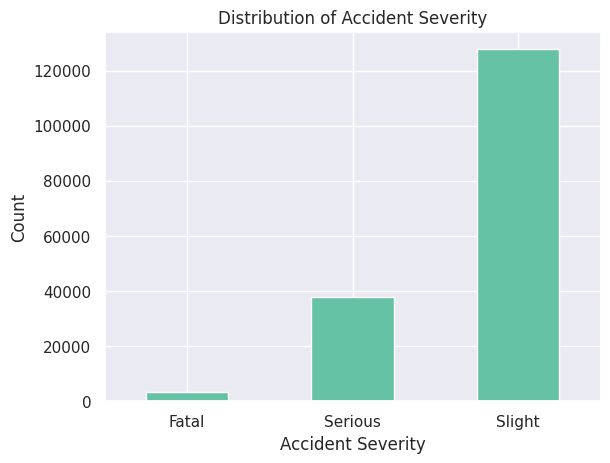

In [ ]:
# Plot the distribution of accident severity
accident_info_df["accident_severity"].value_counts().sort_index().plot(kind="bar")

# Labels and title of the plot
plt.xlabel("Accident Severity")
plt.ylabel("Count")
plt.title("Distribution of Accident Severity")

# Rotate x-axis labels
plt.xticks(rotation=360)

# Show the plot
plt.show()

In our problem, the target variable is accident severity. There are very few fatal accidents and very many slight accidents. This is class imbalance problem. To simplify things, we will remove the "Serious" class from the data, so the decision is to assess whether the accident will be slight or fatal.

In [ ]:
#  Filters out rows from the DataFrame where the "accident_severity" column is not labeled as "Serious"
accident_info_df = accident_info_df[accident_info_df["accident_severity"] != "Serious"]

In [ ]:
# Reset the index of the DataFrame and drop the previous index
accident_info_df.reset_index(inplace=True, drop=True)

In [ ]:
# Get the number of rows and columns in the updated dataframe
accident_info_df.shape

(130996, 17)

There are 130,996 rows and 17 columns in the updated dataset.

In [ ]:
# Define a mapping between integers and corresponding driver home area labels
driverhomeareatype_mapping = {
    1: 'Urban area',
    2: 'Small town',
    3: 'Rural'
}
"""Map the integers in the 'driver_home_area_type' column to their corresponding
    labels using the defined mapping"""
accident_info_df.loc[:,'driver_home_area_type'] = accident_info_df[
    'driver_home_area_type'].map(driverhomeareatype_mapping)

# Examine the result
accident_info_df["driver_home_area_type"].unique()

<ipython-input-234-319f3424dc13>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  accident_info_df.loc[:,'driver_home_area_type'] = accident_info_df[


array(['Urban area', nan, 'Small town', 'Rural'], dtype=object)

In [ ]:
# Define a mapping between integers and corresponding road type labels
roadtype_mapping = {
    1: 'Roundabout',
    2: 'One way street',
    3: 'Dual carriageway',
    6: 'Single carriageway',
    7: 'Slip road',
    12: 'One way street/Slip road'
}

# Map the integers in the 'road_type' column to their corresponding labels using the defined mapping
accident_info_df.loc[:, 'road_type'] = accident_info_df['road_type'].map(roadtype_mapping)

# Examine the result
accident_info_df["road_type"].unique()

<ipython-input-235-fb8bcb6f8a20>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  accident_info_df.loc[:, 'road_type'] = accident_info_df['road_type'].map(roadtype_mapping)


array(['Single carriageway', 'Dual carriageway', 'Roundabout',
       'One way street', 'Slip road', nan], dtype=object)

In [ ]:
# Define a mapping between integers and corresponding skidding and overturning labels
skidding_overturning_mapping = {
    0: 'None',
    1: 'Skidded',
    2: 'Skidded and overturned',
    3: 'Jackknifed',
    4: 'Jackknifed and overturned',
    5: 'Overturned'}

# Map integer values to categorical labels for 'skidding_and_overturning' column
accident_info_df['skidding_and_overturning'] = accident_info_df[
    'skidding_and_overturning'].map(skidding_overturning_mapping)

# Examine the result
accident_info_df["skidding_and_overturning"].unique()

<ipython-input-236-ac6948d9ffee>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  accident_info_df['skidding_and_overturning'] = accident_info_df[


array(['None', 'Skidded', 'Skidded and overturned', 'Jackknifed',
       'Overturned', nan, 'Jackknifed and overturned'], dtype=object)

In [ ]:
# Define a mapping between integers and corresponding vehicle type labels
vehicletype_mapping = {
    1: 'Pedal cycle',
    2: 'Motorcycle 50cc and under',
    3: 'Motorcycle 125cc and under',
    4: 'Motorcycle over 125cc and up to 500cc',
    5: 'Motorcycle over 500cc',
    8: 'Taxi/Private hire car',
    9: 'Car',
    10: 'Minibus (8 - 16 passenger seats)',
    11: 'Bus or coach (17 or more pass seats)',
    16: 'Ridden horse',
    17: 'Agricultural vehicle',
    18: 'Tram',
    19: 'Van / Goods 3.5 tonnes mgw or under',
    20: 'Goods over 3.5t. and under 7.5t',
    21: 'Goods 7.5 tonnes mgw and over',
    22: 'Mobility scooter',
    23: 'Electric motorcycle',
    90: 'Other vehicle',
    97:'Motorcycle - unknown cc',
    98:'Goods vehicle - unknown weight',
    103:'Motorcycle - Scooter (1979-1998)',
    104:'Motorcycle (1979-1998)',
    105: 'Motorcycle - Combination (1979-1998) ',
    106: 'Motorcycle over 125cc (1999-2004) ',
    108: 'Taxi (excluding private hire cars) (1979-2004)',
    109: 'Car (including private hire cars) (1979-2004)',
    110: 'Minibus/Motor caravan (1979-1998)',
    113: 'Goods over 3.5 tonnes (1979-1998)'
}

# Map integer values to categorical labels for 'vehicle_type' column
accident_info_df['vehicle_type'] =accident_info_df[
    'vehicle_type'].map(vehicletype_mapping)

# Examine the result
accident_info_df["vehicle_type"].unique()

<ipython-input-237-0b88a04d27c2>:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  accident_info_df['vehicle_type'] =accident_info_df[


array(['Van / Goods 3.5 tonnes mgw or under',
       'Motorcycle 125cc and under', 'Car',
       'Bus or coach (17 or more pass seats)', 'Taxi/Private hire car',
       'Pedal cycle', 'Motorcycle over 125cc and up to 500cc',
       'Motorcycle - unknown cc', 'Electric motorcycle',
       'Goods over 3.5t. and under 7.5t', 'Motorcycle over 500cc',
       'Minibus (8 - 16 passenger seats)', 'Motorcycle 50cc and under',
       'Other vehicle', 'Goods 7.5 tonnes mgw and over',
       'Goods vehicle - unknown weight', 'Agricultural vehicle', nan,
       'Mobility scooter', 'Tram', 'Ridden horse'], dtype=object)

In [ ]:
# Initialize an "vehiclemanoeuvre_mapping" dictionary to map the value of the "vehicle_manoeuvre"
# variable to corresponding labels.
vehiclemanoeuvre_mapping = {
    1: 'Reversing',
    2: 'Parked',
    3: 'Waiting to go - held up',
    4: 'Slowing or stopping',
    5: 'Moving off',
    6: 'U-turn',
    7: 'Turning left',
    8: 'Waiting to turn left',
    9: 'Turning right',
  10: 'Waiting to turn right',
    11: 'Changing lane to left',
    12: 'Changing lane to right',
    13: 'Overtaking moving vehicle - offside',
    14: 'Overtaking static vehicle - offside',
    15: 'Overtaking - nearside',
    16: 'Going ahead left-hand bend',
    17: 'Going ahead right-hand bend',
    18: 'Going ahead other '}

# Map integer values to categorical labels for 'vehicle_manoeuvre' column
accident_info_df['vehicle_manoeuvre'] = accident_info_df[
    'vehicle_manoeuvre'].map(vehiclemanoeuvre_mapping)

# Examine the result
accident_info_df['vehicle_manoeuvre'].unique()

<ipython-input-238-fd0a5d712fad>:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  accident_info_df['vehicle_manoeuvre'] = accident_info_df[


array(['Turning right', 'Going ahead other ',
       'Overtaking moving vehicle - offside', 'Slowing or stopping',
       'Parked', 'Waiting to go - held up', 'Waiting to turn left',
       'Turning left', 'Overtaking - nearside',
       'Going ahead left-hand bend', 'Moving off', 'U-turn',
       'Going ahead right-hand bend', 'Reversing', nan,
       'Waiting to turn right', 'Overtaking static vehicle - offside',
       'Changing lane to right', 'Changing lane to left'], dtype=object)

In [ ]:
# Define a mapping between integers and corresponding sex of river labels
sexofdriver_mapping = {1: 'Male',2: 'Female'}

# Map integer values to categorical labels for 'sex_of_driver' column
accident_info_df['sex_of_driver'] = accident_info_df[
    'sex_of_driver'].map(sexofdriver_mapping)

# Examine the result
accident_info_df["sex_of_driver"].unique()

array(['Male', 'Female', nan], dtype=object)

In [ ]:
# Define a mapping between integers and corresponding urban_or_rural_area labels
urban_or_rural_area_mapping = {1: 'Urban',
    2: 'Rural',
    3: 'Unallocated' }

# Map integer values to categorical labels for 'urban_or_rural_area' column
accident_info_df['urban_or_rural_area'] =accident_info_df[
    'urban_or_rural_area'].map(urban_or_rural_area_mapping)

# Examine the result
accident_info_df["urban_or_rural_area"].unique()

array(['Urban', 'Rural', 'Unallocated'], dtype=object)

In [ ]:
# Define a mapping between integers and corresponding sex of casuality labels
sex_of_casuality_mapping = {
    1: 'Male',
    2: 'Female'
}

# Map integer values to categorical labels for 'sex_of_casuality' column
accident_info_df['sex_of_casualty'] = accident_info_df['sex_of_casualty'].map(sex_of_casuality_mapping)

# Examine the result
accident_info_df["sex_of_casualty"].unique()

array(['Male', 'Female', nan], dtype=object)

In [ ]:
# Define a mapping between integers and corresponding casualty class labels
casualty_class_mapping ={
    1: 'Driver or rider',
    2: 'Passenger',
    3: 'Pedestrian'
}

# Map integer values to categorical labels for 'casualty_class' column
accident_info_df['casualty_class'] = accident_info_df['casualty_class'].map(casualty_class_mapping)

# Examine the result
accident_info_df["casualty_class"].unique()

array(['Driver or rider', 'Passenger', 'Pedestrian'], dtype=object)

In [ ]:
# Randomly select 10,000 rows from the "accident_info_df" DataFrame
accident_info_df = accident_info_df.sample(n=10000, random_state=42)

In [ ]:
# Predictors are all columns except the last column
X = accident_info_df.loc[:,[col for col in accident_info_df.columns if col != 'accident_severity']]

# The target variable is the last column
y = accident_info_df.loc[:,'accident_severity']

In [ ]:
# Get the number of rows and columns of the X and y
print(X.shape)
print(y.shape)

(10000, 16)
(10000,)


X dataframe: 10,000 rows and 16 columns.
y series: 10,000 rows and 1 column.

In [ ]:
# Show the information about the dataframe
accident_info_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 112489 to 106699
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   sex_of_casualty           9883 non-null   object 
 1   age_of_casualty           9707 non-null   float64
 2   longitude                 9998 non-null   float64
 3   latitude                  9998 non-null   float64
 4   road_type                 9657 non-null   object 
 5   driver_home_area_type     7946 non-null   object 
 6   skidding_and_overturning  8683 non-null   object 
 7   urban_or_rural_area       10000 non-null  object 
 8   vehicle_type              9988 non-null   object 
 9   vehicle_manoeuvre         8651 non-null   object 
 10  sex_of_driver             8624 non-null   object 
 11  age_of_driver             8454 non-null   float64
 12  engine_capacity_cc        7968 non-null   float64
 13  age_of_vehicle            8092 non-null   float64
 14  

### ***3.5.Variable Description***

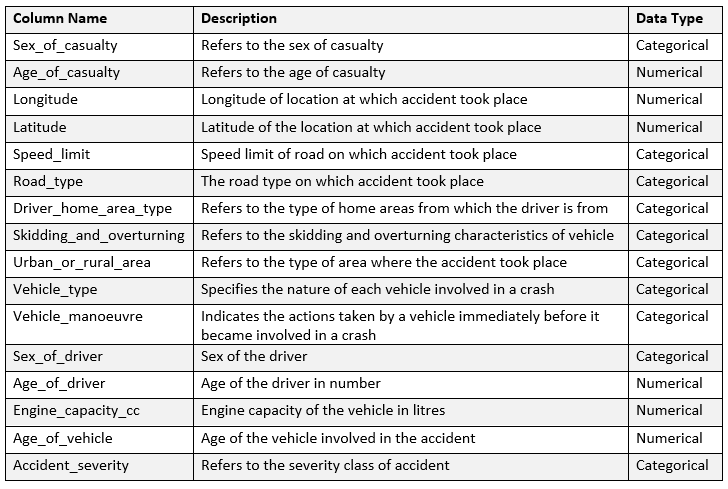

## **4. Train-test split**


---






In [ ]:
# Create a random split
rand_train_set, rand_test_set = train_test_split(accident_info_df, test_size=0.2, random_state=7)

# Perform stratified splitting
strat_train_set, strat_test_set = train_test_split(accident_info_df, test_size=0.2, random_state=7,
                                                  stratify=accident_info_df["accident_severity"])

# Define a function to calculate proportions
def accident_severity_proportions(data):
    return data["accident_severity"].value_counts() / len(data)

# Create a temporary dataframe for easy visualization
df_tmp = pd.DataFrame({
    "Overall": accident_severity_proportions(accident_info_df),
    "Random test set": accident_severity_proportions(rand_test_set),
    "Stratified test set": accident_severity_proportions(strat_test_set),
}).sort_index()

# Add two columns for the percent of the difference to the overall proportion
df_tmp["Rand. %error"] = 100 * df_tmp["Random test set"] / df_tmp["Overall"] - 100
df_tmp["Strat. %error"] = 100 * df_tmp["Stratified test set"] / df_tmp["Overall"] - 100

# Show the result
df_tmp

,Overall,Random test set,Stratified test set,Rand. %error,Strat. %error
Fatal,0.0247,0.0285,0.0245,15.384615,-0.809717
Slight,0.9753,0.9715,0.9755,-0.389624,0.020507


The test set's distribution of our variable of interest was better preserved via stratified sampling. In our work, stratified sampling ought to be prioritised.

In [ ]:
# Conduct stratified sampling
trainset, testset = train_test_split(accident_info_df, test_size=0.2,
                                     stratify=accident_info_df["accident_severity"], random_state=7)

In [ ]:
# Display the distribution of the "accident_severity" categories in the "trainset"
trainset["accident_severity"].value_counts(normalize=True)

Slight    0.97525
Fatal     0.02475
Name: accident_severity, dtype: float64

In [ ]:
# Display the distribution of the "accident_severity" categories in the "testset"
testset["accident_severity"].value_counts(normalize=True)

Slight    0.9755
Fatal     0.0245
Name: accident_severity, dtype: float64

Both the trainset and testset suggest that the vast majority of accidents are classified as 'Slight'.

In [ ]:
print(f"There are {trainset.shape[0]} training and {testset.shape[0]} test instances.")

There are 8000 training and 2000 test instances.


## **5. Descriptive Statistics and Exploratory Data Analysis**


---



### ***5.1. Univariate analysis***


In [ ]:
# Separate the target and predictors
ytrain = trainset["accident_severity"].copy()
Xtrain = trainset.drop("accident_severity", axis=1)
ytest = testset["accident_severity"].copy()
Xtest = testset.drop("accident_severity", axis=1)

*5.1.1. Target Variable*

In [ ]:
# Convert y_train to a Pandas Series if it's a NumPy array
ytrain_series = pd.Series(ytrain)

# Calculate value counts
value_counts = ytrain_series.value_counts()

# Print value counts
print("Value Counts:")
print(value_counts)

Value Counts:
Slight    7802
Fatal      198
Name: accident_severity, dtype: int64


There are 7802 slight accidents and 198 fatal accidents.

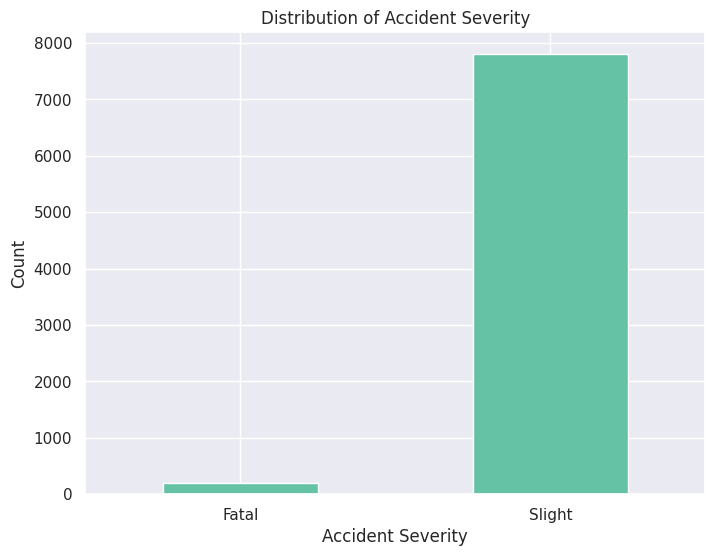

In [ ]:
import matplotlib.pyplot as plt

# Size of the plot
plt.figure(figsize=(8, 6))

# Plot the distribution of accident severity
ytrain.value_counts().sort_index().plot(kind="bar")

# Labels and title of the plot
plt.xlabel("Accident Severity")
plt.ylabel("Count")
plt.title("Distribution of Accident Severity")

# Rotate x-axis labels
plt.xticks(rotation=360)

# Show the plot
plt.show()

Slight accidents are extremely common, whereas fatal accidents are far less common. The majority of slight accidents are often caused by some minor errors such as distracted driving...


In [ ]:
# Calculate value counts of "accident_severity"
values = pd.DataFrame(ytrain.value_counts())
values.columns = ['Accident Severity Count']

# The percentage of each unique value in the target variable
percentages = pd.DataFrame(round(ytrain.value_counts(normalize=True)*100,2).map(lambda x : str(x)+'%'))
percentages.columns = ['Accident Severity %']
values.join(percentages)

,Accident Severity Count,Accident Severity %
Slight,7802,97.52%
Fatal,198,2.48%


Only a small percentage is categorized as "Fatal" (2.48%).

*5.1.2. Numerical Predictors*

* age_of_casualty                             
* longitude                           
*latitude                                                                              
* age_of_driver   
* engine_capacity_cc   
* age_of_vehicle     




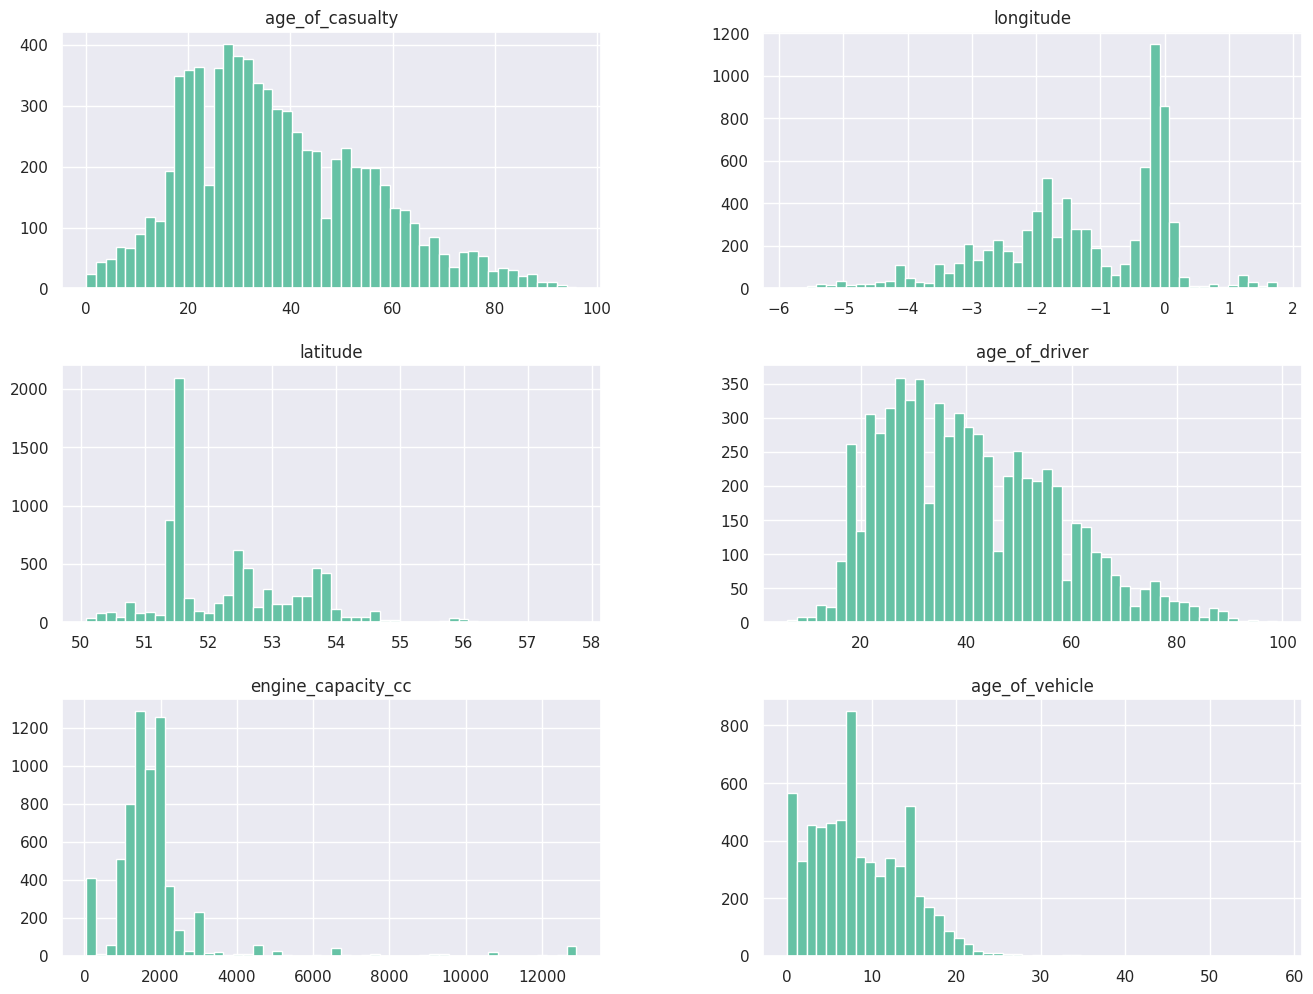

In [ ]:
# Distribution of numerical predictors
_ = Xtrain.hist(bins=50, figsize=(16,12))

The distributions shown in the histogram vary, none of the distributions appear to be perfectly normal as they all show some degree of skewness or multimodality.

5.2.1. Age of casualty

In [ ]:
# Descriptive statistics of the 'age_of_casualty' column in the training dataset
pd.DataFrame(Xtrain)['age_of_casualty'].describe()

count    7761.000000
mean       37.518619
std        17.827342
min         0.000000
25%        24.000000
50%        35.000000
75%        50.000000
max        96.000000
Name: age_of_casualty, dtype: float64

The average age of casualty is around 38 years old, with the standard deviation of about 18 years old. The range is between 0 and 96 years old, highlighting the inclusivity of age groups.

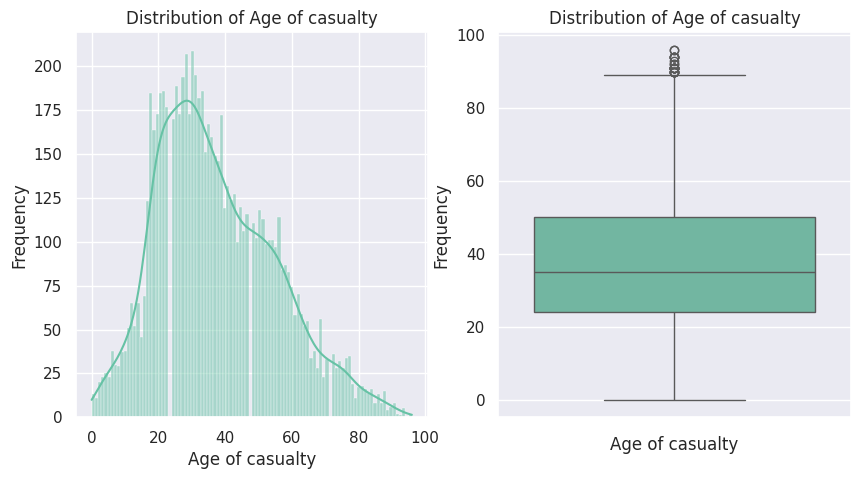

In [ ]:
# Set the size of plot
plt.figure(figsize=(10, 5))

# Plotting histogram
plt.subplot(1,2,1)
# Plot the distribution of 'Occupancy' using Seaborn
histo = sns.histplot(Xtrain.loc[:,'age_of_casualty'], bins = 100, kde=True)
# Add x/y labels for the graph
histo.set_xlabel("Age of casualty")
histo.set_ylabel("Frequency")
# Add title for the graph
histo.set_title('Distribution of Age of casualty')

# Plotting boxplot
plt.subplot(1,2,2)
# Plot the distribution of 'Occupancy' using Seaborn
boxplot = sns.boxplot(Xtrain.loc[:,'age_of_casualty'])
# Add x/y labels for the graph
boxplot.set_xlabel("Age of casualty")
boxplot.set_ylabel("Frequency")
# Add title for the graph
boxplot.set_title('Distribution of Age of casualty')

# Show the plot
plt.show()

Age of casualty is distributed from 0 to 100. A right-skewed distribution suggests that the majority of casualties are younger. Casualties tend to be concentrated '20-40' age group. They can include young drivers who lack driving experience.

In [ ]:
# Calculate and display summary statistics for the 'latitude' feature in the training data
pd.DataFrame(Xtrain)['latitude'].describe()

count    7998.000000
mean       52.310498
std         1.096244
min        50.086598
25%        51.498004
50%        52.068793
75%        53.110978
max        57.759878
Name: latitude, dtype: float64

In [ ]:
# Calculate and display summary statistics for the 'longitude' feature in the training data
pd.DataFrame(Xtrain)['longitude'].describe()

count    7998.000000
mean       -1.287730
std         1.316918
min        -5.875947
25%        -2.087643
50%        -1.222350
75%        -0.141256
max         1.751250
Name: longitude, dtype: float64

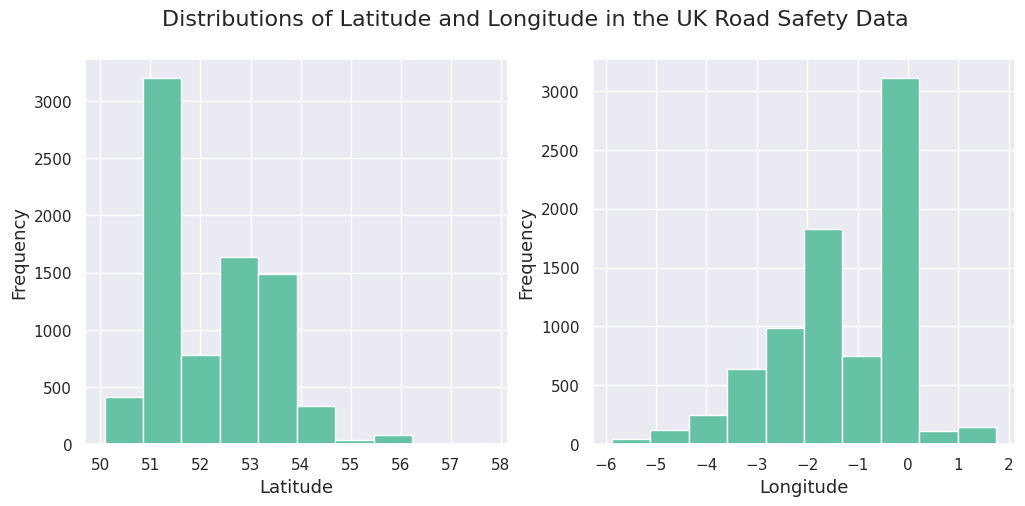

In [ ]:
# Plot a figure and two axes
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Add a title for the figure
fig.suptitle('Distributions of Latitude and Longitude in the UK Road Safety Data', fontsize=16)

# Plot the histogram for 'latitude' on ax1
ax1.hist(Xtrain.loc[:, 'latitude'])
ax1.set_xlabel('Latitude', fontsize=13)
ax1.set_ylabel('Frequency', fontsize=13)

# Plot the histogram for 'longitude' on ax2
ax2.hist(Xtrain.loc[:, 'longitude'])
ax2.set_xlabel('Longitude', fontsize=13)
ax2.set_ylabel('Frequency', fontsize=13)

# Show the plot
plt.show()

The first graph indicates that there are significant numbers of accidents occurring in geographic areas situated around 51 degrees North and 53 degrees North of the Equator (about 3200 and 1600 respectively).  The other graph shows 2 peaks of -2 and 0. There are significant numbers of accidents occurring in geographic areas situated around 0 degree East and 2 degrees West of the Equator.

In [ ]:
# Statistical summary for the 'age_of_driver' attribute from the training data
pd.DataFrame(Xtrain)['age_of_driver'].describe()

count    6770.000000
mean       40.675480
std        16.129646
min         6.000000
25%        28.000000
50%        38.000000
75%        52.000000
max        99.000000
Name: age_of_driver, dtype: float64

The mean age of driver is about 41 years old, with the standard deviation of about 16 years old.

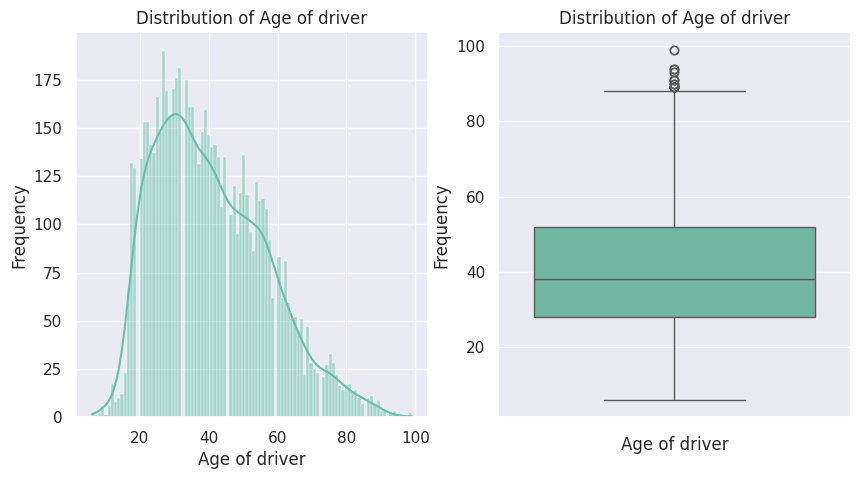

In [ ]:
# Set the size of plot
plt.figure(figsize=(10, 5))

# Plotting histogram
plt.subplot(1,2,1)
# Plot the distribution of 'Age of driver' using Seaborn
histo = sns.histplot(Xtrain.loc[:,'age_of_driver'], bins = 100, kde=True)
# Add x/y labels for the graph
histo.set_xlabel("Age of driver")
histo.set_ylabel("Frequency")
# Add title for the graph
histo.set_title('Distribution of Age of driver')

# Plotting boxplot
plt.subplot(1,2,2)
# Plot the distribution of 'Age of driver' using Seaborn
boxplot = sns.boxplot(Xtrain.loc[:,'age_of_driver'])
# Add x/y labels for the graph
boxplot.set_xlabel("Age of driver")
boxplot.set_ylabel("Frequency")
# Add title for the graph
boxplot.set_title('Distribution of Age of driver')

# Show the plot
plt.show()

There are more young drivers than aged drivers. The graph follows right-skewed distribution. The number of drivers aged 35-40 is the highest. The outlier whiskers in the box plot show that there are several drivers who are older than the majority of population data.

In [ ]:
# Descriptive statistics for the 'engine_capacity_cc' column in the training data
pd.DataFrame(Xtrain)['engine_capacity_cc'].describe()

count     6369.000000
mean      1839.518449
std       1545.059592
min         49.000000
25%       1248.000000
50%       1597.000000
75%       1995.000000
max      12902.000000
Name: engine_capacity_cc, dtype: float64

The mean engine capacity is about 1839.5 miles, with a standard deviation of 1545.06 miles.

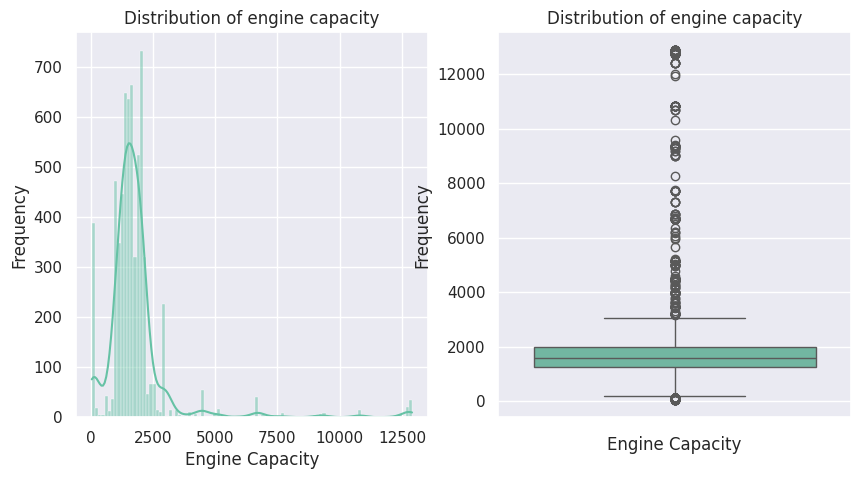

In [ ]:
# Set the size of plot
plt.figure(figsize=(10, 5))

# Plotting histogram
plt.subplot(1,2,1)
# Plot the distribution of 'Engine capacity' using Seaborn
histo = sns.histplot(Xtrain.loc[:,'engine_capacity_cc'], bins = 100, kde=True)
# Add x/y labels for the graph
histo.set_xlabel("Engine Capacity")
histo.set_ylabel("Frequency")
# Add title for the graph
histo.set_title('Distribution of engine capacity')

# Plotting boxplot
plt.subplot(1,2,2)
# Plot the distribution of 'Engine capacity' using Seaborn
boxplot = sns.boxplot(Xtrain.loc[:,'engine_capacity_cc'])
# Add x/y labels for the graph
boxplot.set_xlabel("Engine Capacity")
boxplot.set_ylabel("Frequency")
# Add title for the graph
boxplot.set_title('Distribution of engine capacity')

# Show the plot
plt.show()

The left graph shows high number of cars involved in the accident across different engine capacity ranges, specifically at around 2500 miles. The box plot indicates that 50% of the distribution are either same or lower having the median close to the lower quartile suggesting a skew towards smaller engine capacity.

In [ ]:
# Display statistical summary for the 'age_of_vehicle' column in the training data
pd.DataFrame(Xtrain)['age_of_vehicle'].describe()

count    6467.000000
mean        8.502706
std         5.561688
min         0.000000
25%         4.000000
50%         8.000000
75%        12.000000
max        58.000000
Name: age_of_vehicle, dtype: float64

The mean age of vehicles involved in the accidents is 8.5 years, with a standard deviation of 5.6 years.

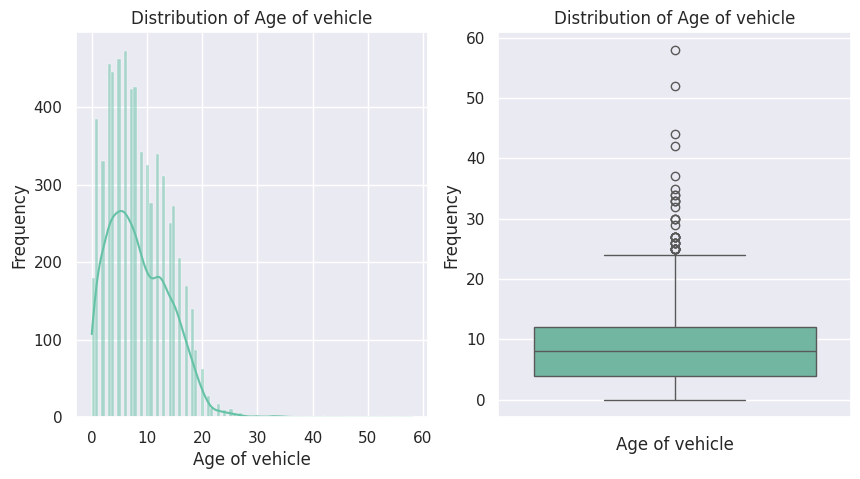

In [ ]:
# Set the size of plot
plt.figure(figsize=(10, 5))

# Plotting histogram
plt.subplot(1,2,1)

# Plot the distribution of 'Age of vehicle' using Seaborn
histo = sns.histplot(Xtrain.loc[:,'age_of_vehicle'], bins = 100, kde=True)
# Add x/y labels for the graph
histo.set_xlabel("Age of vehicle")
histo.set_ylabel("Frequency")
# Add title for the graph
histo.set_title('Distribution of Age of vehicle')

# Plotting boxplot
plt.subplot(1,2,2)
# Plot the distribution of 'Age of vehcile' using Seaborn
boxplot = sns.boxplot(Xtrain.loc[:,'age_of_vehicle'])
# Add x/y labels for the graph
boxplot.set_xlabel("Age of vehicle")
boxplot.set_ylabel("Frequency")
# Add title for the graph
boxplot.set_title('Distribution of Age of vehicle')

# Show the plot
plt.show()

The left graph explains that there are more vehicles within the age bracket of
0-20 and is a right skewed distribution. The peak frequency occurs around 9 years, with approximately 480 vehicles. The right side graph indicates that the median age is about between 9 years.

5.1.3. Categorical predictors

Categorical predictors are shown as below:                   
*   sex_of_casualty       
*   road_type                                                       
*   driver_home_area_type
*   skidding_and_overturning                         
*   urban_or_rural_area
*   casualty_class
* vehicle_type                          
* vehicle_manoeuvre                     
* sex_of_driver   
*   speed_limit





                                         
                                     
                 


In [ ]:
# Print value counts for each categorical column in the training data
for col in Xtrain.select_dtypes(include=['object']).columns:
  print(Xtrain[col].value_counts())
  print()

Male      4853
Female    3054
Name: sex_of_casualty, dtype: int64

Single carriageway    5393
Dual carriageway      1420
Roundabout             500
One way street         238
Slip road              178
Name: road_type, dtype: int64

Urban area    5233
Rural          677
Small town     459
Name: driver_home_area_type, dtype: int64

None                      6198
Skidded                    430
Overturned                 214
Skidded and overturned     115
Jackknifed                   1
Name: skidding_and_overturning, dtype: int64

Urban          5613
Rural          2385
Unallocated       2
Name: urban_or_rural_area, dtype: int64

Car                                      5768
Pedal cycle                               537
Van / Goods 3.5 tonnes mgw or under       484
Motorcycle 125cc and under                365
Taxi/Private hire car                     148
Bus or coach (17 or more pass seats)      146
Goods 7.5 tonnes mgw and over             104
Motorcycle over 500cc                      

Descriptive statistics for each variable are shown in more detailed as below:

**Sex of casualty**  


In [ ]:
# Descriptive statistics for the 'sex_of_casualty' column in the training data
pd.DataFrame(Xtrain.loc[:,'sex_of_casualty'].describe())

,sex_of_casualty
count,7907
unique,2
top,Male
freq,4853


In [ ]:
# Calculate value counts of sex of casualty
values = pd.DataFrame(Xtrain.loc[:,'sex_of_casualty'].value_counts())
values.columns = ['Sex of casualty Count']
# The percentage of each unique value in the "sex of casualty" variable
percentages = pd.DataFrame(round(Xtrain.loc[:,'sex_of_casualty'].value_counts(
    normalize=True)*100,2).map(lambda x : str(x)+'%'))
percentages.columns = ['Sex of casualty %']

# Show the count and percentage
values.join(percentages)

,Sex of casualty Count,Sex of casualty %
Male,4853,61.38%
Female,3054,38.62%


 Male casualties account for approximately 61.38% of the total casualties - significantly higher proportion compared to female casualties.


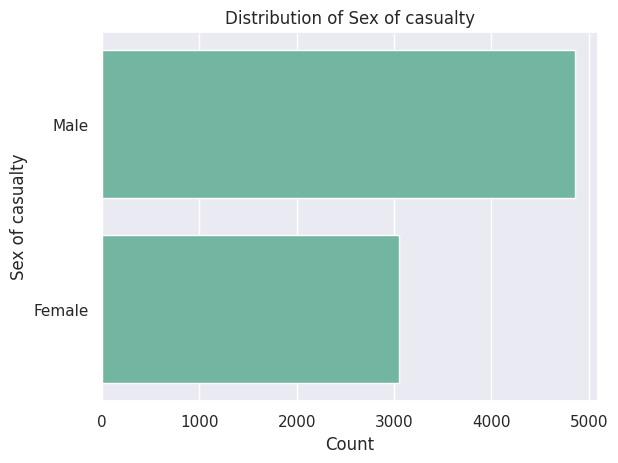

In [ ]:
# Distribution of sex_of_casualty
sns.barplot(x=Xtrain['sex_of_casualty'].value_counts(), y=Xtrain['sex_of_casualty'].value_counts().index)

# Set title for the plot
plt.title("Distribution of Sex of casualty")

# Add x/y labels
plt.xlabel("Count")
plt.ylabel("Sex of casualty")

# Show the plot
plt.show()

There are considerably more male casualties compared with female casualties.  Men tend to exhibit more risk-taking behavior on the road compared to women.



**Road type**

In [ ]:
# Display statistical summary for the 'road_type' column in the training data
pd.DataFrame(Xtrain.loc[:,'road_type'].describe())

,road_type
count,7729
unique,5
top,Single carriageway
freq,5393


In [ ]:
# Calculate value counts of sex of casualty
values = pd.DataFrame(Xtrain.loc[:,'road_type'].value_counts())
values.columns = ['Road type Count']
# The percentage of each unique value in the "sex of casualty" variable
percentages = pd.DataFrame(round(Xtrain.loc[:,'road_type'].value_counts(
    normalize=True)*100,2).map(lambda x : str(x)+'%'))
percentages.columns = ['Road type %']

# Show the count and percentage
values.join(percentages)

,Road type Count,Road type %
Single carriageway,5393,69.78%
Dual carriageway,1420,18.37%
Roundabout,500,6.47%
One way street,238,3.08%
Slip road,178,2.3%


The highest percentage is recorded in single carriageway (69.78%).

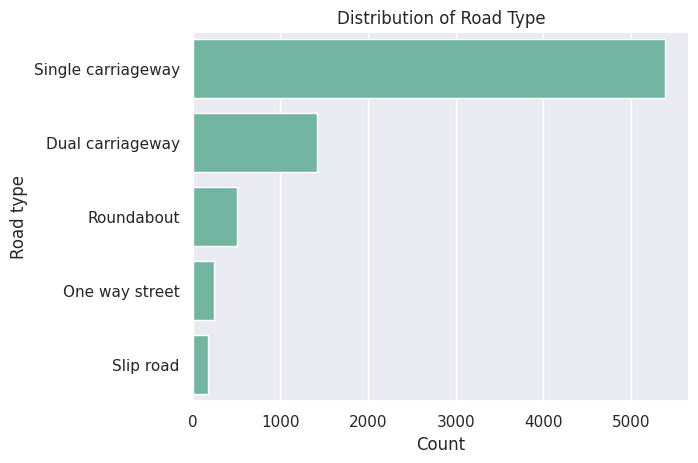

In [ ]:
# Distribution of road type
sns.barplot(x=Xtrain['road_type'].value_counts(), y=Xtrain['road_type'].value_counts().index)

# Set title for the plot
plt.title("Distribution of Road Type")

# Add x/y labels
plt.ylabel("Road type")
plt.xlabel("Count")

# Show the plot
plt.show()

Most accidents took place on single carriageway roads, with 5393 recorded accidents. This is followed by dual carriageway roads, with only 1420 accident. Conversely, only 178 acciddents took place on slip road.


**Driver home area type**

In [ ]:
# Display statistical summary for the 'driver_home_area_type' column in the training data
pd.DataFrame(Xtrain.loc[:,'driver_home_area_type'].describe())

,driver_home_area_type
count,6369
unique,3
top,Urban area
freq,5233


In [ ]:
# Calculate value counts of "driver_home_area_type" variable
values = pd.DataFrame(Xtrain.loc[:,'driver_home_area_type'].value_counts())
values.columns = ['Drivers Home Area Type Count']
# The percentage of each unique value in the "vehicle_left_hand_drive" variable
percentages = pd.DataFrame(round(Xtrain.loc[:,'driver_home_area_type'].value_counts(
    normalize=True)*100,2).map(lambda x : str(x)+'%'))
percentages.columns = ['Drivers Home Area Type %']

# Show the count and percentage
values.join(percentages)

,Drivers Home Area Type Count,Drivers Home Area Type %
Urban area,5233,82.16%
Rural,677,10.63%
Small town,459,7.21%


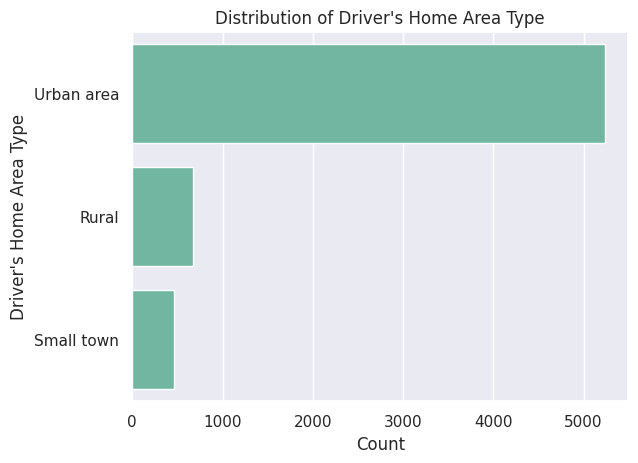

In [ ]:
# Distribution of driver_home_area_type
sns.barplot(x=Xtrain['driver_home_area_type'].value_counts(),
            y=Xtrain['driver_home_area_type'].value_counts().index)

# Set title for the plot
plt.title("Distribution of Driver's Home Area Type")

# Add x/y labels
plt.ylabel("Driver's Home Area Type")
plt.xlabel("Count")

# Show the plot
plt.show()

The majority of drivers involved in the accidents reside in urban areas, with fewer originating from rural areas and the fewest come from small towns.

**Skidding and overturning**

In [ ]:
# Display statistical summary for the 'skidding_and_overturning' column in the training data
pd.DataFrame(Xtrain.loc[:,'skidding_and_overturning'].describe())

,skidding_and_overturning
count,6958
unique,5
top,None
freq,6198


In [ ]:
# Calculate value counts of "skidding_and_overturning" variable
values = pd.DataFrame(Xtrain.loc[:,'skidding_and_overturning'].value_counts())
values.columns = ['Skidding and Overturning characteristics of vehicle Count']
# The percentage of each unique value in the "skidding_and_overturning" variable
percentages = pd.DataFrame(round(Xtrain.loc[:,'skidding_and_overturning'].value_counts(
    normalize=True)*100,2).map(lambda x : str(x)+'%'))
percentages.columns = ['Skidding and Overturning characteristics of vehicle %']

# Show the count and percentage
values.join(percentages)

,Skidding and Overturning characteristics of vehicle Count,Skidding and Overturning characteristics of vehicle %
None,6198,89.08%
Skidded,430,6.18%
Overturned,214,3.08%
Skidded and overturned,115,1.65%
Jackknifed,1,0.01%


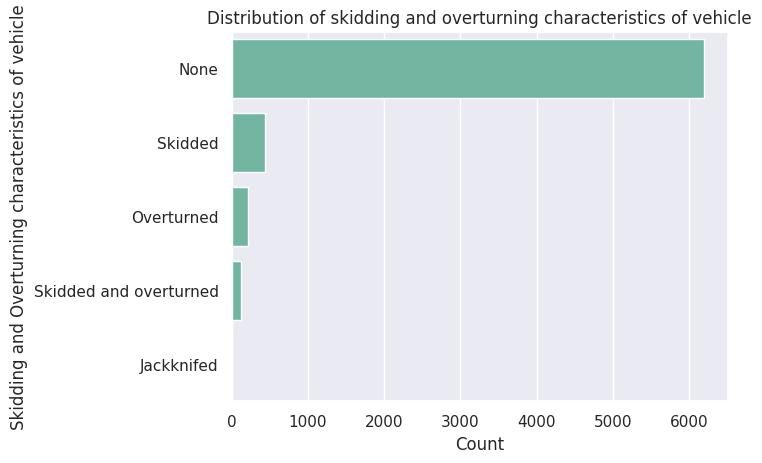

In [ ]:
# Distribution of "skidding_and_overturning" variable
sns.barplot(x=Xtrain['skidding_and_overturning'].value_counts(),
            y=Xtrain['skidding_and_overturning'].value_counts().index)

# Set title for the plot
plt.title("Distribution of skidding and overturning characteristics of vehicle")

# Add x/y labels
plt.ylabel("Skidding and Overturning characteristics of vehicle")
plt.xlabel("Count")

# Show the plot
plt.show()

Most vehicles involved in the crashes are not skidded and overturned. There are only more than 400 skidded vehicles and more than 200 overturned vehicles.


**Vehicle type**

In [ ]:
# Display statistical summary for the 'vehicle_type' column in the training data
pd.DataFrame(Xtrain.loc[:,'vehicle_type'].describe())

,vehicle_type
count,7990
unique,19
top,Car
freq,5768


In [ ]:
# Calculate value counts for vehicle types
values = pd.DataFrame(Xtrain.loc[:,'vehicle_type'].value_counts())
values.columns = ['Vehicle Type Count']
# The percentage of each unique value in the "vehicle_type" variable
percentages = pd.DataFrame(round(Xtrain.loc[:,'vehicle_type'].value_counts(
    normalize=True)*100,2).map(lambda x : str(x)+'%'))
percentages.columns = ['Vehicle type %']

# Show the count and percentage
values.join(percentages)

,Vehicle Type Count,Vehicle type %
Car,5768,72.19%
Pedal cycle,537,6.72%
Van / Goods 3.5 tonnes mgw or under,484,6.06%
Motorcycle 125cc and under,365,4.57%
Taxi/Private hire car,148,1.85%
Bus or coach (17 or more pass seats),146,1.83%
Goods 7.5 tonnes mgw and over,104,1.3%
Motorcycle over 500cc,99,1.24%
Other vehicle,99,1.24%
Motorcycle over 125cc and up to 500cc,70,0.88%


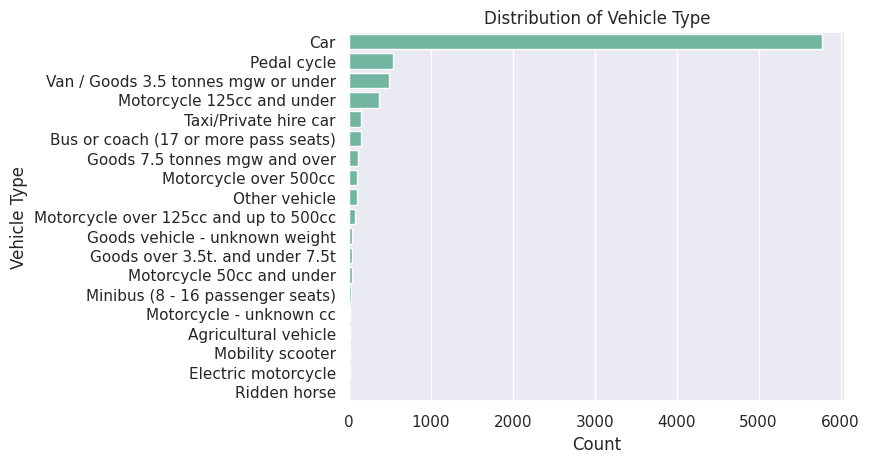

In [ ]:
# Distribution of 'vehicle_type'
sns.barplot(x=Xtrain['vehicle_type'].value_counts(),
            y=Xtrain['vehicle_type'].value_counts().index)

# Set title for the plot
plt.title("Distribution of Vehicle Type")

# Add x/y labels
plt.ylabel("Vehicle Type")
plt.xlabel("Count")

# Show the plot
plt.show()

Regarding  types of vehicles most commonly involved in accidents, cars are the most frequent, followed by pedal cycles, vans/goods vehicles, and motorcycles of various engine capacities. Indeed,  cars are the most commonly used vehicles.

**Vehicle manoeuvre**

In [ ]:
# Descriptive statistics for the 'vehicle_manoeuvre' column
pd.DataFrame(Xtrain.loc[:,'vehicle_manoeuvre'].describe())

,vehicle_manoeuvre
count,6931
unique,18
top,Going ahead other
freq,3487


In [ ]:
# Calculate value counts of "vehicle_manoeuvre" variable
values = pd.DataFrame(Xtrain.loc[:,'vehicle_manoeuvre'].value_counts())
values.columns = ['Vehicle manoeuvre Count']
# The percentage of each unique value in the "vehicle_manoeuvre" variable
percentages = pd.DataFrame(round(Xtrain.loc[:,'vehicle_manoeuvre'].value_counts(
    normalize=True)*100,2).map(lambda x : str(x)+'%'))
percentages.columns = ['Vehicle manoeuvre type %']
values.join(percentages)

,Vehicle manoeuvre Count,Vehicle manoeuvre type %
Going ahead other,3487,50.31%
Turning right,632,9.12%
Slowing or stopping,482,6.95%
Waiting to go - held up,375,5.41%
Moving off,350,5.05%
Parked,325,4.69%
Turning left,280,4.04%
Going ahead right-hand bend,223,3.22%
Going ahead left-hand bend,168,2.42%
Overtaking moving vehicle - offside,104,1.5%


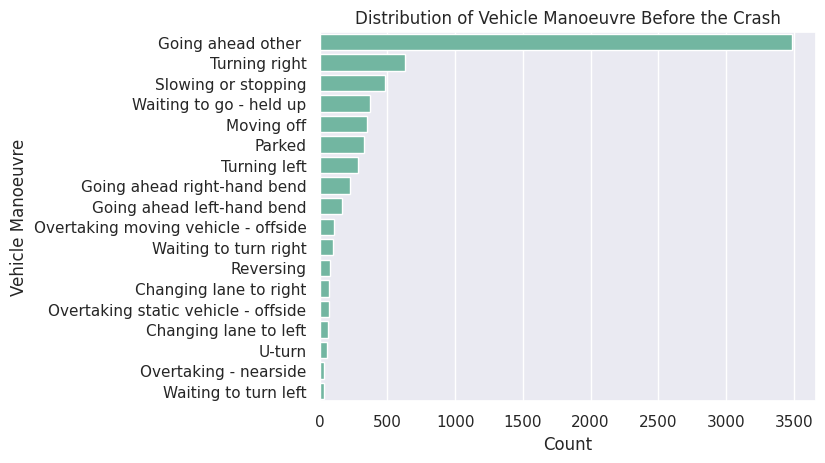

In [ ]:
# Distribution of "vehicle_manoeuvre" variable
sns.barplot(x=Xtrain['vehicle_manoeuvre'].value_counts(),
            y=Xtrain['vehicle_manoeuvre'].value_counts().index)

# Title and labels for the plot
plt.title("Distribution of Vehicle Manoeuvre Before the Crash")
plt.ylabel("Vehicle Manoeuvre")
plt.xlabel("Count")

# Show the plot
plt.show()

Most accidents are caused by vehicles going head other, followed by turning right, slowing or stopping,..

**sex_of_driver**

In [ ]:
# Descriptive statistics for the 'sex_of_driver' column
pd.DataFrame(Xtrain.loc[:,'sex_of_driver'].describe())

,sex_of_driver
count,6906
unique,2
top,Male
freq,4856


In [ ]:
# Calculate value counts of "sex_of_driver" variable
values = pd.DataFrame(Xtrain.loc[:,'sex_of_driver'].value_counts())
values.columns = ['Sex of driver Count']
# The percentage of each unique value in the "sex_of_driver" variable
percentages = pd.DataFrame(round(Xtrain.loc[:,'sex_of_driver'].value_counts(
    normalize=True)*100,2).map(lambda x : str(x)+'%'))
percentages.columns = ['Sex of driver type %']

# Show the count and percentage
values.join(percentages)

,Sex of driver Count,Sex of driver type %
Male,4856,70.32%
Female,2050,29.68%


Male drivers constitute approximately 70.32% of the total.

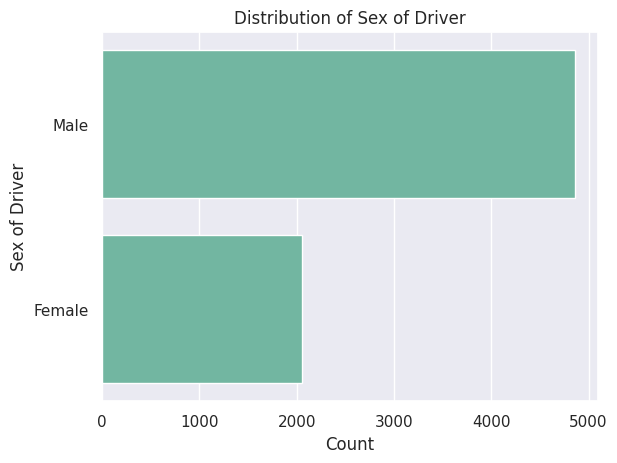

In [ ]:
# Distribution of "sex_of_driver" variable
sns.barplot(x=Xtrain['sex_of_driver'].value_counts(),
            y=Xtrain['sex_of_driver'].value_counts().index)

# Set title for the plot
plt.title("Distribution of Sex of Driver")

# Add x/y labels
plt.ylabel("Sex of Driver")
plt.xlabel("Count")

# Show the plot
plt.show()

There are more male drivers than female drivers involved in the accidents, with 4856 and 2050 respectively.

**Casualty Class**

In [ ]:
# Generate descriptive statistics for the 'casualty_class' column from the training dataset
pd.DataFrame(Xtrain.loc[:,'casualty_class'].describe())

,casualty_class
count,8000
unique,3
top,Driver or rider
freq,5837


In [ ]:
# Calculate value counts of "casualty_class" variable
values = pd.DataFrame(Xtrain.loc[:,'casualty_class'].value_counts())
values.columns = ['Casualty class Count']
# The percentage of each unique value in the "casualty_class" variable
percentages = pd.DataFrame(round(Xtrain.loc[:,'casualty_class'].value_counts(
    normalize=True)*100,2).map(lambda x : str(x)+'%'))
percentages.columns = ['Casualty_class type %']

# Show the count and percentage
values.join(percentages)

,Casualty class Count,Casualty_class type %
Driver or rider,5837,72.96%
Passenger,1574,19.68%
Pedestrian,589,7.36%


 Driver or rider casualties constitute approximately 72.96% of the total, while pedestrian casualties only constitute 7.36%.

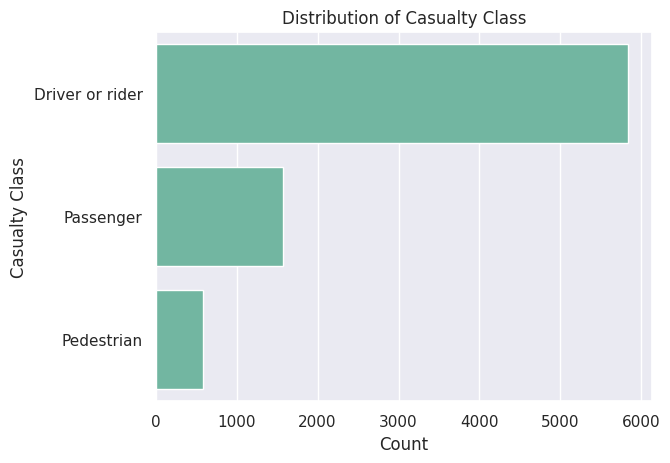

In [ ]:
# Distribution of "casualty_class" variable
sns.barplot(x=Xtrain['casualty_class'].value_counts(),
            y=Xtrain['casualty_class'].value_counts().index)

# Set title for the plot
plt.title("Distribution of Casualty Class")

# Add x/y labels
plt.ylabel("Casualty Class")
plt.xlabel("Count")

# Show the plot
plt.show()

Drivers or riders are  mostly injured than any other casualty class, with almost 6000 individuals. The passengers casualty is about 1574 and the pedestrian casualty accounts for 589.

### ***5.2. Bivariate Analysis***

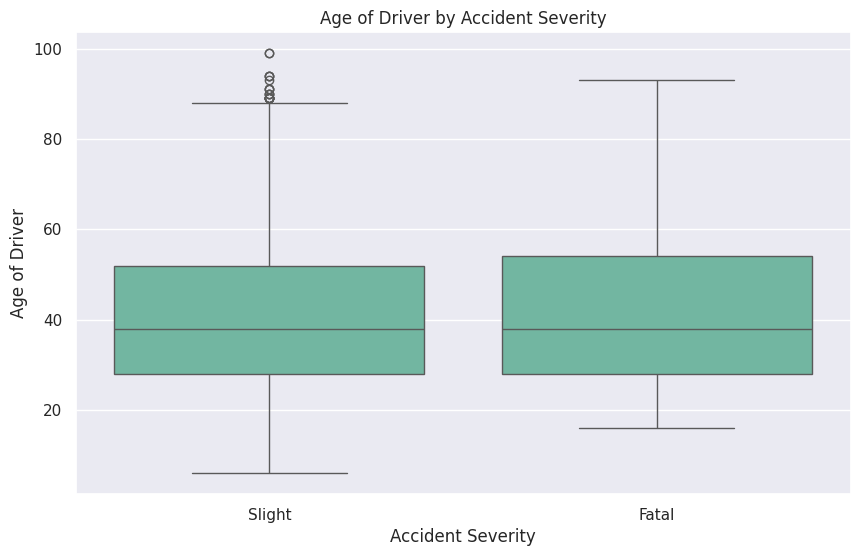

In [ ]:
# Plotting box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='accident_severity', y='age_of_driver', data=trainset)

# Labels and title for the plot
plt.xlabel('Accident Severity')
plt.ylabel('Age of Driver')
plt.title('Age of Driver by Accident Severity')

# Show the plot
plt.show()

 Fatal accidents have a overall broader age range when compared to slight accidents. The median ages of driver involved in both natures of accidents are the same (below 40). Slight accidents show more outliers indicating older driver involvement.

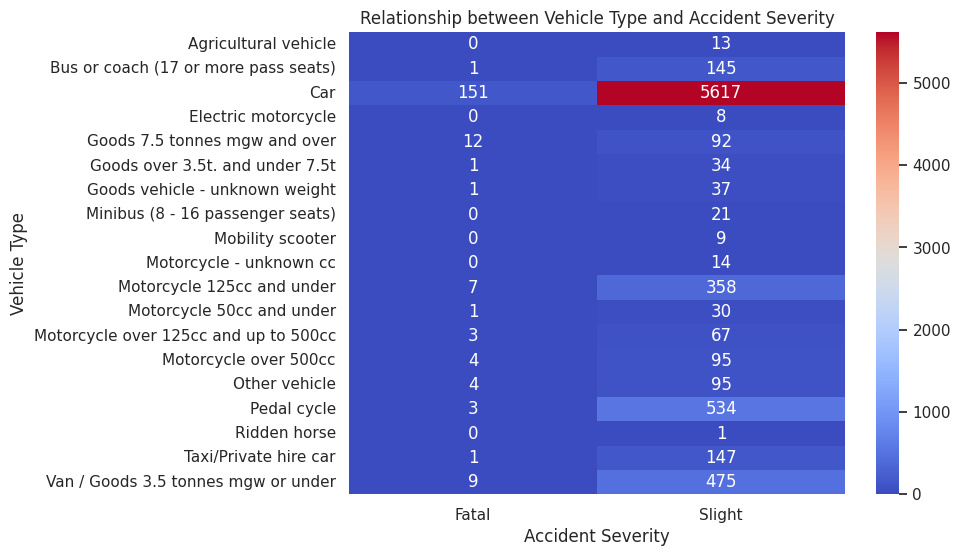

In [ ]:
# Create a cross-tabulation of vehicle type and accident severity
cross_tab = pd.crosstab(trainset['vehicle_type'], trainset['accident_severity'])

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cross_tab, annot=True, fmt='d', cmap='coolwarm')

# Title and labels
plt.xlabel('Accident Severity')
plt.ylabel('Vehicle Type')
plt.title('Relationship between Vehicle Type and Accident Severity')

# Show the plot
plt.show()

Cars are involved in 5617 slight accidents and 151 fatal accidents. Pedal cycles are involved in 534 fatal accidents, whereas there are significantly lower numbers of both slight and fatal accidents involving other vehicle types.

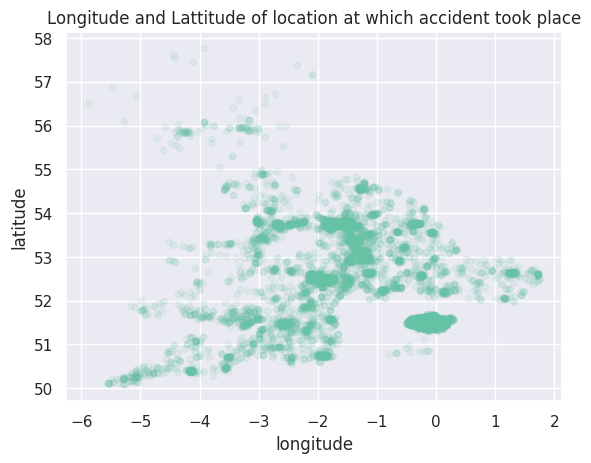

In [ ]:
# Plot a scatter plot of 'longitude' versus 'latitude' with low opacity to visualize the density of data points in the training set
Xtrain.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)

# Title of the plot
plt.title("Longitude and Lattitude of location at which accident took place")

# Show the plot
plt.show()

The high concentration of dots in one place indicates higher number of accidents in geographic areas situated around 0 degree East and 51.5 degrees North of the Equator.

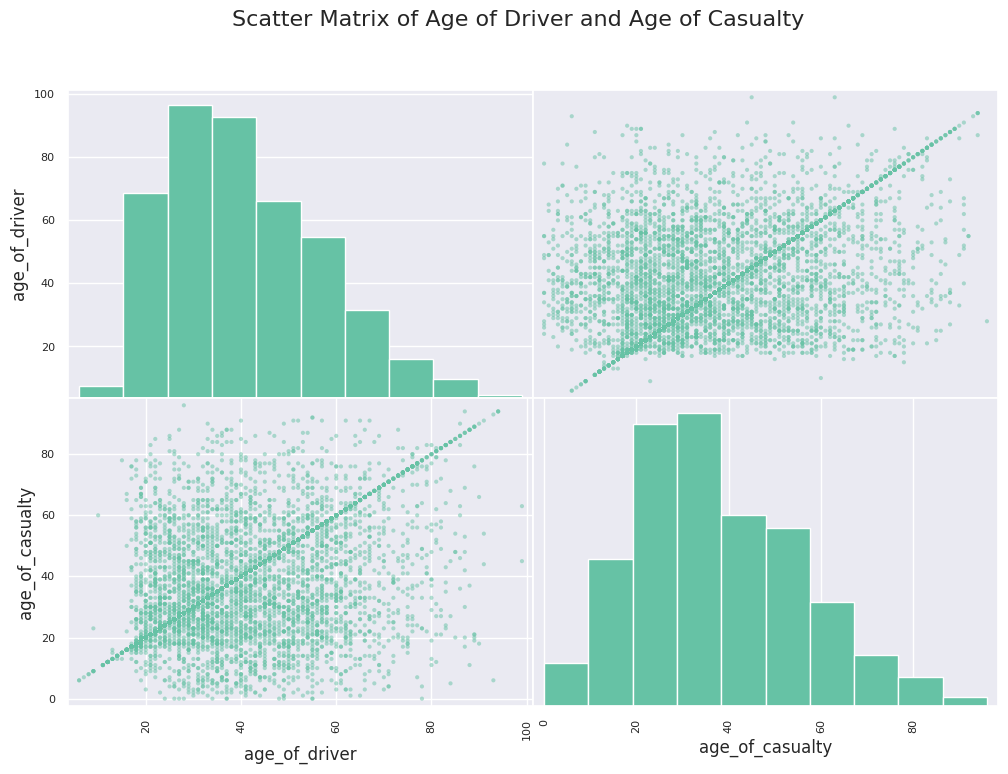

In [ ]:
# Scatter matrix
from pandas.plotting import scatter_matrix

# Select only the variables that are most likely to be correlated
vars = ["age_of_driver", "age_of_casualty"]
scatter_matrix(Xtrain[vars], figsize=(12, 8))

# Title for the plot
plt.suptitle('Scatter Matrix of Age of Driver and Age of Casualty', fontsize=16)

# Show the plot
plt.show()

The points moving upward suggests positive correlation between variables.

### ***5.3. Multivariate analysis***

#### Correlation matrix

Correlation measures are meant to be applied to continuous variables, I'd better exclude dummy variables.

In [ ]:
# Calculate the Pearson correlation matrix
corr_matrix = Xtrain.corr(method="pearson", numeric_only=True)

# Apply a color gradient to the correlation matrix and format the precision
corr_matrix.style.background_gradient(cmap='coolwarm', axis=None).format(precision=3)

,age_of_casualty,longitude,latitude,age_of_driver,engine_capacity_cc,age_of_vehicle
age_of_casualty,1.000,-0.044,0.033,0.451,0.052,0.011
longitude,-0.044,1.000,-0.142,-0.070,-0.011,-0.092
latitude,0.033,-0.142,1.000,0.022,0.023,0.004
age_of_driver,0.451,-0.070,0.022,1.000,0.110,0.006
engine_capacity_cc,0.052,-0.011,0.023,0.110,1.000,-0.005
age_of_vehicle,0.011,-0.092,0.004,0.006,-0.005,1.000


As suggested by scatter matrix, the age of casualty and age of driver show positive moderate correlation (0.451), while the remaining variables show weak correlations with each other.

## **6. Data  Preprocessing**

###***6.1. Feature Engineering***

I create new paramaters as below

In [ ]:
# New feature: 'driver_experience'

# Define age groups for driving experience
young_threshold = 25
experienced_threshold = 40

# Function to categorize age into experience levels
def categorize_experience(age):
    if age <= young_threshold:
        return 'Novice'
    elif age <= experienced_threshold:
        return 'Experienced'
    else:
        return 'Senior'

# Create a new feature 'driver_experience' for the training set
trainset['driver_experience'] = trainset['age_of_driver'].apply(categorize_experience)

# Create a new feature 'driver_experience' for the test set
testset['driver_experience'] = testset['age_of_driver'].apply(categorize_experience)

# Display the updated DataFrame for the training set
print("Training Set:")
print(trainset[['age_of_driver', 'driver_experience']].head())

# Display the updated DataFrame for the test set
print("\nTest Set:")
print(testset[['age_of_driver', 'driver_experience']].head())

Training Set:
        age_of_driver driver_experience
107090           27.0       Experienced
73708            20.0            Novice
115581           65.0            Senior
64401            18.0            Novice
120474           27.0       Experienced

Test Set:
        age_of_driver driver_experience
103548           77.0            Senior
54750            34.0       Experienced
39949            40.0       Experienced
36975            22.0            Novice
85133            30.0       Experienced


In [ ]:
# New feature: 'vehicle_type_group'

# Function to create the Vehicle Type Group feature - reclassification
# Group different vehicle types into broader categories
def create_vehicle_type_group(data):
    # Map vehicle types to broader categories
    vehicle_types = {
        'Car': ['Car', 'Taxi/Private hire car'],
        'Van/Truck': ['Van / Goods 3.5 tonnes mgw or under', 'Goods over 7.5 tonnes mgw'],
        'Motorcycle': ['Motorcycle 125cc and under', 'Motorcycle over 500cc',
                       'Motorcycle over 125cc and up to 500cc', 'Motorcycle 50cc and under'],
        'Bus/Coach': ['Bus or coach (17 or more pass seats)'],
        'Other': ['Other vehicle', 'Goods over 3.5t. and under 7.5t',
                  'Minibus (8 - 16 passenger seats)', 'Agricultural vehicle']
    }
     # Initialize the new feature column
    data['vehicle_type_group'] = 'Other'

    # Iterate over the vehicle types and assign broader categories to each row based on the vehicle type
    for group, types in vehicle_types.items():
        data.loc[data['vehicle_type'].isin(types), 'vehicle_type_group'] = group

    return data

# Create the Vehicle Type Group feature for trainset and testset
trainset = create_vehicle_type_group(trainset)
testset = create_vehicle_type_group(testset)

# Delete original 'vehicle_type' column on training and testing data
trainset.drop(columns=['vehicle_type'], inplace=True)
testset.drop(columns=['vehicle_type'], inplace=True)

In [ ]:
# New feature: 'vehicle_manoeuvre_group'

# Function to create the Vehicle Manoeuvre Group feature - reclassification
def create_vehicle_manoeuvre_group(data):
    # Define broader categories for vehicle manoeuvres
    vehicle_manoeuvres = {
        'Going ahead other': ['Going ahead other'],
        'Turning right': ['Turning right'],
        'Moving off': ['Moving off'],
        'Waiting': ['Waiting to go - held up', 'Waiting to turn right', 'Waiting to turn left'],
        'Slowing or stopping': ['Slowing or stopping'],
        'Turning left': ['Turning left'],
        'Going ahead right-hand bend': ['Going ahead right-hand bend'],
        'Going ahead left-hand bend': ['Going ahead left-hand bend'],
        'Overtaking': ['Overtaking moving vehicle - offside',
                       'Overtaking static vehicle - offside', 'Overtaking - nearside'],
        'Parked': ['Parked'],
        'U-turn': ['U-turn'],
        'Changing lane': ['Changing lane to left', 'Changing lane to right'],
        'Reversing': ['Reversing']
    }

    # Initialize the new feature column
    data['vehicle_manoeuvre_group'] = 'Other'

    """Iterate over the vehicle manoeuvres and assign broader categories to
    each row based on the vehicle manoeuvre"""
    for group, manoeuvres in vehicle_manoeuvres.items():
        data.loc[data['vehicle_manoeuvre'].isin(manoeuvres), 'vehicle_manoeuvre_group'] = group

    return data

# Apply the function to create the vehicle manoeuvre group feature
trainset = create_vehicle_manoeuvre_group(trainset)
testset = create_vehicle_manoeuvre_group(testset)

# Delete original 'vehicle_manoeuvre' column on training and testing data
trainset.drop(columns=['vehicle_manoeuvre'], inplace=True)
testset.drop(columns=['vehicle_manoeuvre'], inplace=True)

In [ ]:
# New feature: 'driver_attention'

# Function to categorize driver attention level based on age_of_driver and speed_limit
def categorize_attention(age, speed_limit):
    if age <= 25 and speed_limit > 60:
        return 'Distracted'
    elif age > 25 and speed_limit > 80:
        return 'Distracted'
    else:
        return 'Focused'

# Apply the categorize_attention function to the trainset
trainset['driver_attention'] = trainset.apply(lambda row: categorize_attention(row[
    'age_of_driver'], row['speed_limit']), axis=1)

# Apply the categorize_attention function to the testset
testset['driver_attention'] = testset.apply(lambda row: categorize_attention(row[
    'age_of_driver'], row['speed_limit']), axis=1)

# Display the updated DataFrame for the training set
print("Training Set:")
print(trainset[['age_of_driver', 'speed_limit','driver_attention']].head())

# Display the updated DataFrame for the test set
print("\nTest Set:")
print(testset[['age_of_driver','speed_limit', 'driver_attention']].head())

Training Set:
        age_of_driver speed_limit driver_attention
107090           27.0          20          Focused
73708            20.0          30          Focused
115581           65.0          40          Focused
64401            18.0          20          Focused
120474           27.0          40          Focused

Test Set:
        age_of_driver speed_limit driver_attention
103548           77.0          40          Focused
54750            34.0          30          Focused
39949            40.0          40          Focused
36975            22.0          20          Focused
85133            30.0          30          Focused


In [ ]:
# New feature: 'engine power'

# Calculate engine power using the formula engine power = engine capacity * 0.1
trainset['engine_power'] = trainset['engine_capacity_cc'] * 0.1
testset['engine_power'] = testset['engine_capacity_cc'] * 0.1

# Drop "engine_capacity_cc" coiumn in trainset and testset
trainset.drop(columns=['engine_capacity_cc'], inplace=True)
testset.drop(columns=['engine_capacity_cc'], inplace=True)

In [ ]:
# Display updated trainset
trainset.head()

,sex_of_casualty,age_of_casualty,longitude,latitude,road_type,driver_home_area_type,skidding_and_overturning,urban_or_rural_area,sex_of_driver,age_of_driver,age_of_vehicle,accident_severity,casualty_class,speed_limit,driver_experience,vehicle_type_group,vehicle_manoeuvre_group,driver_attention,engine_power
107090,Female,27.0,-3.536407,50.723430,Single carriageway,Urban area,None,Urban,Female,27.0,9.0,Slight,Driver or rider,20,Experienced,Car,Other,Focused,89.8
73708,Male,20.0,-1.498464,52.449163,Dual carriageway,Urban area,None,Urban,Male,20.0,4.0,Slight,Driver or rider,30,Novice,Van/Truck,Waiting,Focused,214.3
115581,Female,1.0,-2.486802,51.512902,Single carriageway,Urban area,None,Urban,Female,65.0,5.0,Slight,Passenger,40,Senior,Car,Turning right,Focused,131.8
64401,Female,78.0,0.031953,53.730971,Single carriageway,Small town,None,Rural,Male,18.0,15.0,Slight,Pedestrian,20,Novice,Car,Moving off,Focused,119.8
120474,Male,27.0,-2.209978,51.314858,Single carriageway,Urban area,None,Urban,Male,27.0,15.0,Slight,Driver or rider,40,Experienced,Car,Overtaking,Focused,196.8


In [ ]:
# Display updated testset
testset.head()

,sex_of_casualty,age_of_casualty,longitude,latitude,road_type,driver_home_area_type,skidding_and_overturning,urban_or_rural_area,sex_of_driver,age_of_driver,age_of_vehicle,accident_severity,casualty_class,speed_limit,driver_experience,vehicle_type_group,vehicle_manoeuvre_group,driver_attention,engine_power
103548,Female,20.0,1.306373,52.652762,Single carriageway,Urban area,None,Urban,Male,77.0,3.0,Slight,Pedestrian,40,Senior,Car,Other,Focused,149.9
54750,Male,3.0,-1.584483,53.811703,Single carriageway,Urban area,None,Urban,Female,34.0,14.0,Slight,Pedestrian,30,Experienced,Car,Other,Focused,114.9
39949,Male,40.0,-0.253580,51.558691,Slip road,Urban area,NaN,Urban,Male,40.0,6.0,Slight,Driver or rider,40,Experienced,Car,Other,Focused,146.1
36975,Male,22.0,-0.354215,51.553528,Roundabout,Urban area,None,Urban,Male,22.0,0.0,Slight,Driver or rider,20,Novice,Motorcycle,Moving off,Focused,12.5
85133,Male,30.0,-1.478730,52.909254,Single carriageway,Urban area,None,Urban,Male,30.0,NaN,Slight,Driver or rider,30,Experienced,Other,Other,Focused,NaN


### ***6.2. Missing values***

*Simple Imputer*

In [ ]:
# Check the number of missing values in the training dataset
trainset.isnull().sum()

sex_of_casualty               93
age_of_casualty              239
longitude                      2
latitude                       2
road_type                    271
driver_home_area_type       1631
skidding_and_overturning    1042
urban_or_rural_area            0
sex_of_driver               1094
age_of_driver               1230
age_of_vehicle              1533
accident_severity              0
casualty_class                 0
speed_limit                    0
driver_experience              0
vehicle_type_group             0
vehicle_manoeuvre_group        0
driver_attention               0
engine_power                1631
dtype: int64

In [ ]:
# Check the number of missing values in the testing dataset
testset.isnull().sum()

sex_of_casualty              24
age_of_casualty              54
longitude                     0
latitude                      0
road_type                    72
driver_home_area_type       423
skidding_and_overturning    275
urban_or_rural_area           0
sex_of_driver               282
age_of_driver               316
age_of_vehicle              375
accident_severity             0
casualty_class                0
speed_limit                   0
driver_experience             0
vehicle_type_group            0
vehicle_manoeuvre_group       0
driver_attention              0
engine_power                401
dtype: int64

There are missing values in some columns in training and testing data. We'll handle missing values of numerical variables and categorical variables separately.

In [ ]:
# Dealing with numerical variables on training set

# Initialize a SimpleImputer object for numerical variables
imputer_num = SimpleImputer(strategy="median")

# Select only the numerical variables from training set
numerical_columns_train = trainset.select_dtypes(include=['float64', 'int64']).columns

# Extract numerical features from the training set
train_num = trainset[numerical_columns_train]

# Fit the imputer
imputer_num.fit(train_num)

SimpleImputer(strategy='median')

In [ ]:
# The transform method returns a np array, so we create a pd.DataFrame from it
train_num = pd.DataFrame(imputer_num.transform(train_num),
                                     columns=train_num.columns,
                                     index=train_num.index)

In [ ]:
# Check if there are missing values now
train_num.isnull().sum()

age_of_casualty    0
longitude          0
latitude           0
age_of_driver      0
age_of_vehicle     0
engine_power       0
dtype: int64

In [ ]:
# Dealing with categorical variables on training set

# Select only the categorical variables from training set
categorical_columns_train = trainset.select_dtypes(include=['object']).columns

# Extract categorical features from the training set
train_cat = trainset[categorical_columns_train]

# Initialize the SimpleImputer with strategy='most_frequent'
imputer_cat = SimpleImputer(strategy="most_frequent")

# Fit the imputer
imputer_cat.fit(train_cat)

SimpleImputer(strategy='most_frequent')

In [ ]:
# The transform method returns a np array, so we create a pd.DataFrame from it
train_cat = pd.DataFrame(imputer_cat.transform(train_cat),
                                     columns=train_cat.columns,
                                     index=train_cat.index)

# check if there are missing values now
train_cat.isnull().sum()

sex_of_casualty             0
road_type                   0
driver_home_area_type       0
skidding_and_overturning    0
urban_or_rural_area         0
sex_of_driver               0
accident_severity           0
casualty_class              0
speed_limit                 0
driver_experience           0
vehicle_type_group          0
vehicle_manoeuvre_group     0
driver_attention            0
dtype: int64

In [ ]:
# Dealing with numerical variables on testing set

# Select only the numerical variables from testing set
numerical_columns_test = testset.select_dtypes(include=['float64', 'int64']).columns

# Extract numerical features from the testing set
test_num = testset[numerical_columns_test]

# Fit the imputer
imputer_num.fit(test_num)

# The transform method returns a np array, so we create a pd.DataFrame from it
test_num  = pd.DataFrame(imputer_num.transform(test_num),
                                     columns=test_num.columns,
                                     index=test_num.index)

# check if there are missing values now
test_num.isnull().sum()

age_of_casualty    0
longitude          0
latitude           0
age_of_driver      0
age_of_vehicle     0
engine_power       0
dtype: int64

In [ ]:
# Dealing with catogorical variables on testing set

# Select only the cateogrical variables from testing set
categorical_columns_test = testset.select_dtypes(include=['object']).columns

# Extract categorical features from the testing set
test_cat = testset[categorical_columns_test]

# Fit the imputer
imputer_cat.fit(test_cat)

# The transform method returns a np array, so we create a pd.DataFrame from it
test_cat = pd.DataFrame(imputer_cat.transform(test_cat),
                                     columns=test_cat.columns,
                                     index=test_cat.index)

# check if there are missing values now
test_cat.isnull().sum()

sex_of_casualty             0
road_type                   0
driver_home_area_type       0
skidding_and_overturning    0
urban_or_rural_area         0
sex_of_driver               0
accident_severity           0
casualty_class              0
speed_limit                 0
driver_experience           0
vehicle_type_group          0
vehicle_manoeuvre_group     0
driver_attention            0
dtype: int64

The updated dataset have no missing values now.

In [ ]:
# Combine train_num and train_cat into trainset
trainset = train_num.merge(train_cat,left_index=True, right_index=True)
# Combine test_num and test_cat into testset
testset = test_num.merge(test_cat,left_index=True, right_index=True)

### ***6.3. Dummy variables***

I transform categorical variables into dummy variables. I use the "OneHotEncoder" from the "scikit-learn" library.

In [ ]:
# Create the OneHotEncoder with drop="first" and handle_unknown='ignore'
one_hot_encoder = OneHotEncoder(drop="first", handle_unknown='ignore', sparse=False)

In [ ]:
# Categorical columns to transform except target variable
cat_column = ['sex_of_casualty','sex_of_driver', 'driver_home_area_type','road_type',
                             'skidding_and_overturning',
                             'vehicle_type_group','vehicle_manoeuvre_group',
                             'urban_or_rural_area', 'casualty_class','driver_attention','driver_experience']

In [ ]:
# Fit an encoder and transform the **trainset**
cat_vals = trainset[cat_column].to_numpy()
cat_vals

array([['Female', 'Female', 'Urban area', ..., 'Driver or rider',
        'Focused', 'Experienced'],
       ['Male', 'Male', 'Urban area', ..., 'Driver or rider', 'Focused',
        'Novice'],
       ['Female', 'Female', 'Urban area', ..., 'Passenger', 'Focused',
        'Senior'],
       ...,
       ['Male', 'Male', 'Urban area', ..., 'Driver or rider', 'Focused',
        'Senior'],
       ['Male', 'Male', 'Urban area', ..., 'Pedestrian', 'Focused',
        'Experienced'],
       ['Male', 'Male', 'Urban area', ..., 'Driver or rider', 'Focused',
        'Senior']], dtype=object)

In [ ]:
# Apply one-hot encoding to categorical variables in cat_vals and store the transformed data in 'transformed'
transformed = one_hot_encoder.fit_transform(cat_vals)
transformed

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


array([[0., 0., 0., ..., 1., 0., 0.],
       [1., 1., 0., ..., 1., 1., 0.],
       [0., 0., 0., ..., 1., 0., 1.],
       ...,
       [1., 1., 0., ..., 1., 0., 1.],
       [1., 1., 0., ..., 1., 0., 0.],
       [1., 1., 0., ..., 1., 0., 1.]])

In [ ]:
# The names of the new columns
new_col_names = one_hot_encoder.get_feature_names_out(cat_column)

# Show the names of the new columns
new_col_names

array(['sex_of_casualty_Male', 'sex_of_driver_Male',
       'driver_home_area_type_Small town',
       'driver_home_area_type_Urban area', 'road_type_One way street',
       'road_type_Roundabout', 'road_type_Single carriageway',
       'road_type_Slip road', 'skidding_and_overturning_None',
       'skidding_and_overturning_Overturned',
       'skidding_and_overturning_Skidded',
       'skidding_and_overturning_Skidded and overturned',
       'vehicle_type_group_Car', 'vehicle_type_group_Motorcycle',
       'vehicle_type_group_Other', 'vehicle_type_group_Van/Truck',
       'vehicle_manoeuvre_group_Going ahead left-hand bend',
       'vehicle_manoeuvre_group_Going ahead right-hand bend',
       'vehicle_manoeuvre_group_Moving off',
       'vehicle_manoeuvre_group_Other',
       'vehicle_manoeuvre_group_Overtaking',
       'vehicle_manoeuvre_group_Parked',
       'vehicle_manoeuvre_group_Reversing',
       'vehicle_manoeuvre_group_Slowing or stopping',
       'vehicle_manoeuvre_group_Tur

In [ ]:
# Put the transformed data as columns in the trainset dataframe
for i, new_col_name in enumerate(new_col_names):
    trainset[new_col_name] = transformed[:,i]

# Check if the dummies are produced correctly in the trainset
trainset.head()

,age_of_casualty,longitude,latitude,age_of_driver,age_of_vehicle,engine_power,sex_of_casualty,road_type,driver_home_area_type,skidding_and_overturning,...,vehicle_manoeuvre_group_Turning right,vehicle_manoeuvre_group_U-turn,vehicle_manoeuvre_group_Waiting,urban_or_rural_area_Unallocated,urban_or_rural_area_Urban,casualty_class_Passenger,casualty_class_Pedestrian,driver_attention_Focused,driver_experience_Novice,driver_experience_Senior
107090,27.0,-3.536407,50.723430,27.0,9.0,89.8,Female,Single carriageway,Urban area,None,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
73708,20.0,-1.498464,52.449163,20.0,4.0,214.3,Male,Dual carriageway,Urban area,None,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
115581,1.0,-2.486802,51.512902,65.0,5.0,131.8,Female,Single carriageway,Urban area,None,...,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0
64401,78.0,0.031953,53.730971,18.0,15.0,119.8,Female,Single carriageway,Small town,None,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
120474,27.0,-2.209978,51.314858,27.0,15.0,196.8,Male,Single carriageway,Urban area,None,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
# Delete the original categorical columns
trainset = trainset.drop(cat_column, axis=1)

In [ ]:
# transform the **testset** using the encoder fitted on trainset
cat_vals = testset[cat_column]
transformed = one_hot_encoder.transform(cat_vals)

# put the transformed data as columns in the testset dataframe
for i, new_col_name in enumerate(new_col_names):
    testset[new_col_name] = transformed[:,i]

# check if the dummies are produced correctly in the testset
testset.head()

,age_of_casualty,longitude,latitude,age_of_driver,age_of_vehicle,engine_power,sex_of_casualty,road_type,driver_home_area_type,skidding_and_overturning,...,vehicle_manoeuvre_group_Turning right,vehicle_manoeuvre_group_U-turn,vehicle_manoeuvre_group_Waiting,urban_or_rural_area_Unallocated,urban_or_rural_area_Urban,casualty_class_Passenger,casualty_class_Pedestrian,driver_attention_Focused,driver_experience_Novice,driver_experience_Senior
103548,20.0,1.306373,52.652762,77.0,3.0,149.9,Female,Single carriageway,Urban area,None,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0
54750,3.0,-1.584483,53.811703,34.0,14.0,114.9,Male,Single carriageway,Urban area,None,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
39949,40.0,-0.253580,51.558691,40.0,6.0,146.1,Male,Slip road,Urban area,None,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
36975,22.0,-0.354215,51.553528,22.0,0.0,12.5,Male,Roundabout,Urban area,None,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
85133,30.0,-1.478730,52.909254,30.0,8.0,159.6,Male,Single carriageway,Urban area,None,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [ ]:
# Delete the original categorical columns
testset = testset.drop(cat_column, axis=1)

In [ ]:
# Separate the target and predictors again
ytrain = trainset["accident_severity"].copy()
Xtrain = trainset.drop("accident_severity", axis=1)
ytest = testset["accident_severity"].copy()
Xtest = testset.drop("accident_severity", axis=1)

**Other imputation methods for handling missing values**

*KNN Imputer*

In [ ]:
# Create a copy of the original training DataFrames
trainset_tmp = trainset.copy()

# Exclude the target variable from trainset_tmp
predictors_train = trainset_tmp.drop(columns=['accident_severity'])

# Mask approximately 10% of the values with NaN
predictors_train = predictors_train.mask(np.random.random(predictors_train.shape) < 0.1, other=np.NaN)

# Check the sum of missing values
print(predictors_train.isnull().sum())

age_of_casualty                                        796
longitude                                              829
latitude                                               783
age_of_driver                                          775
age_of_vehicle                                         780
engine_power                                           786
speed_limit                                            793
sex_of_casualty_Male                                   830
sex_of_driver_Male                                     788
driver_home_area_type_Small town                       824
driver_home_area_type_Urban area                       836
road_type_One way street                               811
road_type_Roundabout                                   793
road_type_Single carriageway                           860
road_type_Slip road                                    752
skidding_and_overturning_None                          812
skidding_and_overturning_Overturned                    8

In [ ]:
# Create a copy of the original testing DataFrames
testset_tmp = testset.copy()

# Exclude the target variable from testset_tmp
predictors_test = testset_tmp.drop(columns=['accident_severity'])

# Mask approximately 10% of the values with NaN
predictors_test= predictors_test.mask(np.random.random(predictors_test.shape) < .1, other=np.NaN)

# Check the sum of missing values
predictors_test.isnull().sum()

age_of_casualty                                        200
longitude                                              193
latitude                                               188
age_of_driver                                          206
age_of_vehicle                                         201
engine_power                                           190
speed_limit                                            195
sex_of_casualty_Male                                   212
sex_of_driver_Male                                     185
driver_home_area_type_Small town                       218
driver_home_area_type_Urban area                       204
road_type_One way street                               209
road_type_Roundabout                                   193
road_type_Single carriageway                           232
road_type_Slip road                                    199
skidding_and_overturning_None                          230
skidding_and_overturning_Overturned                    1

There are missing values in almost all columns in training and testing data.

In [ ]:
# Initialize a KNNImputer object with the number of neighbors = 3
imputer = KNNImputer(n_neighbors=3)

"""Fit the imputer to the predictors_train and execute imputation by transforming
the predictors_train. Then, convert the output back to a DataFrame."""
predictors_train = pd.DataFrame(imputer.fit_transform(predictors_train),
                                     columns=predictors_train.columns,
                                     index=predictors_train.index)

# check if there are missing values now
predictors_train.isnull().sum()

age_of_casualty                                        0
longitude                                              0
latitude                                               0
age_of_driver                                          0
age_of_vehicle                                         0
engine_power                                           0
speed_limit                                            0
sex_of_casualty_Male                                   0
sex_of_driver_Male                                     0
driver_home_area_type_Small town                       0
driver_home_area_type_Urban area                       0
road_type_One way street                               0
road_type_Roundabout                                   0
road_type_Single carriageway                           0
road_type_Slip road                                    0
skidding_and_overturning_None                          0
skidding_and_overturning_Overturned                    0
skidding_and_overturning_Skidde

In [ ]:
"""Fit the imputer to the predictors_test and execute imputation by transforming
the predictors_test. Then, convert the output back to a DataFrame."""
predictors_test = pd.DataFrame(imputer.transform(predictors_test),
                                     columns=predictors_test.columns,
                                     index=predictors_test.index)

# check if there are missing values now
predictors_test.isnull().sum()

age_of_casualty                                        0
longitude                                              0
latitude                                               0
age_of_driver                                          0
age_of_vehicle                                         0
engine_power                                           0
speed_limit                                            0
sex_of_casualty_Male                                   0
sex_of_driver_Male                                     0
driver_home_area_type_Small town                       0
driver_home_area_type_Urban area                       0
road_type_One way street                               0
road_type_Roundabout                                   0
road_type_Single carriageway                           0
road_type_Slip road                                    0
skidding_and_overturning_None                          0
skidding_and_overturning_Overturned                    0
skidding_and_overturning_Skidde

There are no missing values now.

*IterativeImputer (Multiple Imputation by Chained Equation, MICE)*

In [ ]:
# Create a copy of the original training DataFrames
trainset_tmp = trainset.copy()

# Exclude the target variable from trainset_tmp
predictors_train = trainset_tmp.drop(columns=['accident_severity'])

# Mask approximately 10% of the values with NaN
predictors_train = predictors_train.mask(np.random.random(predictors_train.shape) < 0.1, other=np.NaN)

# Check the sum of missing values
print(predictors_train.isnull().sum())

age_of_casualty                                        798
longitude                                              754
latitude                                               801
age_of_driver                                          793
age_of_vehicle                                         789
engine_power                                           761
speed_limit                                            797
sex_of_casualty_Male                                   817
sex_of_driver_Male                                     793
driver_home_area_type_Small town                       795
driver_home_area_type_Urban area                       766
road_type_One way street                               800
road_type_Roundabout                                   811
road_type_Single carriageway                           778
road_type_Slip road                                    824
skidding_and_overturning_None                          799
skidding_and_overturning_Overturned                    7

In [ ]:
# Create a copy of the original testing DataFrames
testset_tmp = testset.copy()

# Exclude the target variable from testset_tmp
predictors_test = testset_tmp.drop(columns=['accident_severity'])

# Mask approximately 10% of the values with NaN
predictors_test= predictors_test.mask(np.random.random(predictors_test.shape) < .1, other=np.NaN)

# Check the sum of missing values
predictors_test.isnull().sum()

age_of_casualty                                        205
longitude                                              179
latitude                                               182
age_of_driver                                          178
age_of_vehicle                                         220
engine_power                                           200
speed_limit                                            184
sex_of_casualty_Male                                   207
sex_of_driver_Male                                     163
driver_home_area_type_Small town                       192
driver_home_area_type_Urban area                       197
road_type_One way street                               176
road_type_Roundabout                                   199
road_type_Single carriageway                           199
road_type_Slip road                                    211
skidding_and_overturning_None                          236
skidding_and_overturning_Overturned                    1

Similarly, there are missing values in almost all columns in training and testing data.

In [ ]:
# Instantiate an iterative imputer with a maximum of 20 iterations
imputer = IterativeImputer(max_iter=20)

# Impute missing values in the training predictors dataframe using the imputer and update the dataframe
predictors_train = pd.DataFrame(imputer.fit_transform(predictors_train),
                                     columns=predictors_train.columns,
                                     index=predictors_train.index)

# Check for any remaining missing values in the training predictors dataframe
predictors_train.isnull().sum()

age_of_casualty                                        0
longitude                                              0
latitude                                               0
age_of_driver                                          0
age_of_vehicle                                         0
engine_power                                           0
speed_limit                                            0
sex_of_casualty_Male                                   0
sex_of_driver_Male                                     0
driver_home_area_type_Small town                       0
driver_home_area_type_Urban area                       0
road_type_One way street                               0
road_type_Roundabout                                   0
road_type_Single carriageway                           0
road_type_Slip road                                    0
skidding_and_overturning_None                          0
skidding_and_overturning_Overturned                    0
skidding_and_overturning_Skidde

In [ ]:
# Impute missing values in the testing predictors dataframe using the imputer and update the dataframe
predictors_test = pd.DataFrame(imputer.transform(predictors_test),
                                     columns=predictors_test.columns,
                                     index=predictors_test.index)

# Check for any remaining missing values in the testing predictors dataframe
predictors_test.isnull().sum()

age_of_casualty                                        0
longitude                                              0
latitude                                               0
age_of_driver                                          0
age_of_vehicle                                         0
engine_power                                           0
speed_limit                                            0
sex_of_casualty_Male                                   0
sex_of_driver_Male                                     0
driver_home_area_type_Small town                       0
driver_home_area_type_Urban area                       0
road_type_One way street                               0
road_type_Roundabout                                   0
road_type_Single carriageway                           0
road_type_Slip road                                    0
skidding_and_overturning_None                          0
skidding_and_overturning_Overturned                    0
skidding_and_overturning_Skidde

There are no missing values now.

In [ ]:
# Combine predictors and target variable on training data
trainset = predictors_train.merge(trainset['accident_severity'], left_index=True, right_index=True)

In [ ]:
# Combine predictors and target variable on testing data
testset = predictors_test.merge(testset['accident_severity'], left_index=True, right_index=True)

In [ ]:
# Display updated trainset
trainset.head()

,age_of_casualty,longitude,latitude,age_of_driver,age_of_vehicle,engine_power,speed_limit,sex_of_casualty_Male,sex_of_driver_Male,driver_home_area_type_Small town,...,vehicle_manoeuvre_group_U-turn,vehicle_manoeuvre_group_Waiting,urban_or_rural_area_Unallocated,urban_or_rural_area_Urban,casualty_class_Passenger,casualty_class_Pedestrian,driver_attention_Focused,driver_experience_Novice,driver_experience_Senior,accident_severity
107090,27.0,-3.536407,50.723430,40.594807,9.000000,89.8,20.0,0.0,0.0,0.000000,...,0.0,0.000000,0.0,1.000000,0.0,0.000000,1.0,0.0,0.518576,Slight
73708,20.0,-1.498464,52.449163,20.000000,4.000000,214.3,30.0,1.0,1.0,-0.010252,...,0.0,0.872267,0.0,1.000000,0.0,0.000000,1.0,1.0,0.000000,Slight
115581,1.0,-2.486802,51.512902,65.000000,5.000000,131.8,40.0,0.0,0.0,0.000000,...,0.0,0.000000,0.0,0.533469,1.0,0.056425,1.0,0.0,1.000000,Slight
64401,78.0,0.031953,53.730971,18.000000,15.000000,119.8,20.0,0.0,1.0,1.000000,...,0.0,0.000000,0.0,0.000000,0.0,1.000000,1.0,1.0,0.000000,Slight
120474,27.0,-2.209978,51.314858,27.000000,9.569439,196.8,40.0,1.0,1.0,0.000000,...,0.0,0.000000,0.0,0.594172,0.0,0.000000,1.0,0.0,0.000000,Slight


In [ ]:
# Display updated testset
testset.head()

,age_of_casualty,longitude,latitude,age_of_driver,age_of_vehicle,engine_power,speed_limit,sex_of_casualty_Male,sex_of_driver_Male,driver_home_area_type_Small town,...,vehicle_manoeuvre_group_U-turn,vehicle_manoeuvre_group_Waiting,urban_or_rural_area_Unallocated,urban_or_rural_area_Urban,casualty_class_Passenger,casualty_class_Pedestrian,driver_attention_Focused,driver_experience_Novice,driver_experience_Senior,accident_severity
103548,20.0,1.306373,52.652762,77.000000,3.0,149.9,40.000000,0.0,1.0,0.0,...,0.000000,0.0,0.0,1.0,0.000000,1.000000,1.0,0.0,1.000000,Slight
54750,3.0,-1.584483,53.811703,34.000000,14.0,114.9,30.000000,1.0,0.0,0.0,...,0.000000,0.0,0.0,1.0,0.201668,0.080852,1.0,0.0,0.000000,Slight
39949,40.0,-0.564430,51.558691,40.000000,6.0,146.1,31.600832,1.0,1.0,0.0,...,0.000000,0.0,0.0,1.0,0.000000,0.055059,1.0,0.0,0.000000,Slight
36975,22.0,-0.354215,51.553528,22.000000,0.0,12.5,20.000000,1.0,1.0,0.0,...,-0.004475,0.0,0.0,1.0,0.000000,0.000000,1.0,1.0,0.000000,Slight
85133,30.0,-1.478730,52.254862,39.976112,8.0,159.6,30.000000,1.0,1.0,0.0,...,0.000000,0.0,0.0,1.0,0.000000,0.094160,1.0,0.0,0.578718,Slight


### ***6.4. Log transformation***

array([[<Axes: title={'center': 'age_of_casualty'}>,
        <Axes: title={'center': 'age_of_driver'}>],
       [<Axes: title={'center': 'age_of_vehicle'}>, <Axes: >]],
      dtype=object)

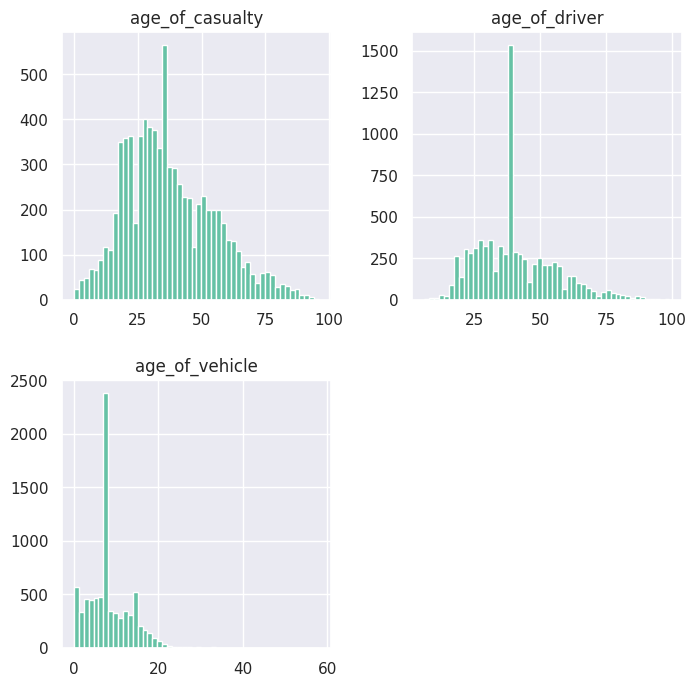

In [ ]:
# Display histogram plot of numerical variable
Xtrain[['age_of_casualty','age_of_driver','age_of_vehicle']].hist(bins=50, figsize=(8,8))

The distributions are highly skewed. Log transformation will be applied to make it more symmetrical.

In [ ]:
# Apply natural logarithm transformation to specific columns in the training set (Xtrain) and test set (Xtest)
# Columns include 'age_of_casualty', 'age_of_driver', 'engine_capacity_cc', and 'age_of_vehicle'
for col in ['age_of_casualty','age_of_driver','age_of_vehicle']:
    Xtrain.loc[:, col] = np.log(Xtrain.loc[:, col] + 1)
    Xtest.loc[:, col] = np.log(Xtest.loc[:, col] + 1)

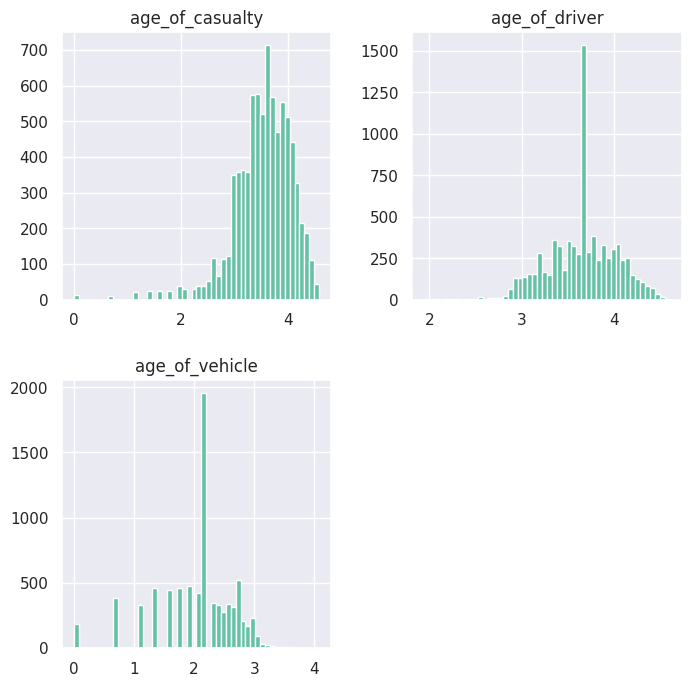

In [ ]:
# The histograms of the transformed columns in the training set
_ = Xtrain[['age_of_casualty','age_of_driver','age_of_vehicle']].hist(bins=50, figsize=(8,8))

Age of vehicle becomes more evenly spread out, while before log transformation, the distribution was heavily right-skewed. The effect of log transformation on other 2 variables is not clear.

### ***6.5. Outlier detection***

*6.5.1. Standard deviation method*

In [ ]:
class StdOutlierDetector(OutlierMixin):
    def __init__(self, threshold=3):
        """
        Initializes the StdOutlierDetector instance.

        Args:
        - threshold (float): Threshold value to determine outliers based on z-score.
        """
        self.threshold = threshold
        self.m, self.std = None, None

    def fit(self, X, y=None):
        """
        Fits the outlier detector to the data.

        Args:
        - X (array-like): Input data.

        Returns:
        - self: Returns the instance itself.
        """
        self.m = X.mean()
        self.std = X.std()
        return self

    def predict(self, X, y=None):
        """Return -1 to indicate outliers, 1 to indicate inliers
        """
        z = np.abs((X - self.m) / self.std)
        return np.where((z <= self.threshold).all(axis=1), 1, -1)

# Example usage
Xtrain_tmp = np.array([[-1.1, -1.1], [0.2, 0.2], [1001.1, 0.2], [0.3, 1000.3]])
Xtest_tmp = np.array([[1, 1], [0.3, 900.3]])
clf = StdOutlierDetector(threshold=1)
yhat = clf.fit_predict(Xtrain_tmp)
yhat

array([ 1,  1, -1, -1])

In [ ]:
# Predict outliers in the test data 'Xtest_tmp'
yhat = clf.predict(Xtest_tmp)

# Show the predicted outliers
yhat

array([ 1, -1])

In [ ]:
# Show the dimension of Xtrain
Xtrain.shape

(8000, 42)

In [ ]:
# Show the dimension of Xtest
Xtest.shape

(2000, 42)

In [ ]:
# remove outliers in training set

# Initialize an instance of the StdOutlierDetector class with a threshold value of 3
clf = StdOutlierDetector(threshold=3)

# Predict outliers in the training data 'Xtrain'
yhat = clf.fit_predict(Xtrain)

# Filter the training data based on yhat (Outliers equal to '-1')
Xtrain_tmp = Xtrain[yhat != -1]
ytrain_tmp = ytrain[yhat != -1]

# Check the dimensions of the filtered Xtrain_tmp
Xtrain_tmp.shape

(2514, 42)

5486 outliers were removed from the training data - a substantial proportion of the data being removed.

In [ ]:
# remove outliers in test set

# Predict outliers in the testing data 'Xtest'
yhat = clf.predict(Xtest)

# Filter the testing data based on yhat (Outliers equal to '-1')
Xtest_tmp = Xtest[yhat == 1]
ytest_tmp = ytest[yhat != -1]

# Check the dimensions of the filtered Xtest_tmp
Xtest_tmp.shape

(610, 42)

1390 outliers were removed from the testing data according to this method.

*6.5.2. IQR method*

In [ ]:
class IqrOutlierDetector(OutlierMixin):
    """Custom outlier detector using the interquartile range (IQR) method.

    Parameters:
    - factor (float): Multiplier for the IQR to determine outlier thresholds.

    Attributes:
    - factor (float): Multiplier for the IQR to determine outlier thresholds.
    - upper (numpy.ndarray): Upper threshold for each feature.
    - lower (numpy.ndarray): Lower threshold for each feature.
    """

    def __init__(self, factor=1.5):
        """
        Initializes the IqrOutlierDetector instance.

        Args:
        - factor (float): Multiplier for the IQR to determine outlier thresholds.
        """
        self.factor = factor
        self.upper, self.lower = None, None

    def fit(self, X, y=None):
        """
        Fits the outlier detector to the data.

        Args:
        - X (array-like): Input data.

        Returns:
        - self: Returns the instance itself.
        """
        try:
            assert X.isnull().sum().sum() == 0
        except AttributeError:
            assert np.isnan(X).sum() == 0
        q25 = np.percentile(X, 25, axis=0)
        q75 = np.percentile(X, 75, axis=0)
        cut_off = (q75 - q25) * self.factor
        self.lower = q25 - cut_off
        self.upper = q75 + cut_off
        return self

    def predict(self, X, y=None):
        """
        Predicts outliers in the data.

        Args:
        - X (array-like): Input data.

        Returns:
        - numpy.ndarray: An array of predictions where -1 indicates outliers and 1 indicates inliers.
        """
        return np.where(((X >= self.lower) & (X <= self.upper)).all(axis=1), 1, -1)

In [ ]:
# Example usage
# Create a NumPy array Xtrain_tmp containing four data points
Xtrain_tmp = np.array([[-1.1, -1.1], [0.2, 0.2], [1001.1, 0.2], [0.3, 1000.3]])

# Create a NumPy array Xtest_tmp containing two data points
Xtest_tmp = np.array([[1, 1], [0.3, 900.3]])

# Initialize an instance of the IqrOutlierDetector class
clf = IqrOutlierDetector()

# Predict outliers in the training data 'Xtrain_tmp'
yhat = clf.fit_predict(Xtrain_tmp)

# Store the results in 'yhat'
yhat

array([ 1,  1, -1, -1])

In [ ]:
# Predict outliers in the testing data 'Xtest_tmp'
yhat = clf.predict(Xtest_tmp)

# Store the results in 'yhat'
yhat

array([ 1, -1])

In [ ]:
# Re-initialize the instance (clf)
clf = IqrOutlierDetector()

# Predict outliers in the training data 'Xtrain'
yhat = clf.fit_predict(Xtrain)

In [ ]:
# Filter the training data based on yhat (Outliers equal to '-1')
Xtrain_tmp = Xtrain[yhat != -1]
ytrain_tmp = ytrain[yhat != -1]

# Check the dimensions of the filtered 'Xtrain_tmp'
Xtrain_tmp.shape

(1008, 42)


Removing 6992 outliers from training data of 8000 observations is indeed a significant proportion.

In [ ]:
# Predict outliers in the training data 'Xtest'
yhat = clf.predict(Xtest)

# Filter the testing data based on yhat (Outliers equal to '-1')
Xtest_tmp = Xtest[yhat == 1]
ytest_tmp = ytest[yhat != -1]

# Check the dimensions of the filtered 'Xtest_tmp'
Xtest_tmp.shape

(240, 42)

1760 outliers were removed from testing data.

Isolation Forest intuitively works better as it looks at instances as a whole, not in terms of a single feature. It has outliers only along 1 single feature.

*6.5.3. Isolation Forest*

In [ ]:
# Inspect the shape of Xtrain and Xtest
Xtrain.shape, Xtest.shape

((8000, 42), (2000, 42))

In [ ]:
# Create an instance of the IsolationForest class named clf with specified parameters
# Fit the isolation forest model to the training data Xtrain
clf = IsolationForest(n_estimators=100, random_state=0, contamination=0.05).fit(Xtrain)

# Predict anomaly scores for each observation in the training data
yhat = clf.predict(Xtrain)

# Filter the training data based on yhat (Outliers equal to '-1')
Xtrain = Xtrain[yhat != -1]
ytrain = ytrain[yhat != -1]

# Check the dimensions of the filtered Xtrain
Xtrain.shape

(7600, 42)

400 outliers were identified and removed from the training data.

In [ ]:
"""Predict test labels with clf, then filter Xtest to keep only instances
predicted as class 1 and adjust ytest accordinglys"""
# Predict anomaly scores for each observation in the testing data
yhat = clf.predict(Xtest)

# Filter the testing data based on yhat (Outliers equal to '-1')
Xtest = Xtest[yhat == 1]
ytest = ytest[yhat != -1]

# Check the shape of the filtered Xtest
Xtest.shape

(1906, 42)

94 outliers were identified and removed from the testing data.

We'll use Isolation Forest for outlier detection.

### ***6.6. Feature selection***

In [ ]:
# Create an instance of SelectKBest to select the top 29 features
selector = SelectKBest(score_func=f_classif, k=29)

# Fit the SelectKBest instance to the training data
Xtrain = selector.fit_transform(Xtrain, ytrain)

# Transform the test data
Xtest = selector.transform(Xtest)

In [ ]:
# Check the names of selected features
selector.get_feature_names_out()

array(['age_of_casualty', 'longitude', 'latitude', 'age_of_driver',
       'engine_power', 'speed_limit', 'sex_of_casualty_Male',
       'sex_of_driver_Male', 'driver_home_area_type_Small town',
       'driver_home_area_type_Urban area', 'road_type_One way street',
       'road_type_Roundabout', 'road_type_Slip road',
       'skidding_and_overturning_None',
       'skidding_and_overturning_Overturned',
       'skidding_and_overturning_Skidded',
       'vehicle_manoeuvre_group_Going ahead right-hand bend',
       'vehicle_manoeuvre_group_Moving off',
       'vehicle_manoeuvre_group_Other',
       'vehicle_manoeuvre_group_Overtaking',
       'vehicle_manoeuvre_group_Reversing',
       'vehicle_manoeuvre_group_Slowing or stopping',
       'vehicle_manoeuvre_group_Turning left',
       'vehicle_manoeuvre_group_Turning right',
       'vehicle_manoeuvre_group_U-turn', 'urban_or_rural_area_Urban',
       'casualty_class_Passenger', 'casualty_class_Pedestrian',
       'driver_experience_Senior

29 top features are chosen as above.

In [ ]:
"""fit_transform returns a NumPy array,  we put it back
into a Pandas dataframe"""
Xtrain = pd.DataFrame(Xtrain, columns=selector.get_feature_names_out())
Xtest = pd.DataFrame(Xtest, columns=selector.get_feature_names_out())

### ***6.7. Feature Scaling***

In [ ]:
# Create an instance of StandardScaler
scaler = StandardScaler()

"""fit_transform returns a NumPy array, so we need to put it back
into a Pandas dataframe"""
# Fit and transform the Xtrain
scaled_vals = scaler.fit_transform(Xtrain)
Xtrain = pd.DataFrame(scaled_vals, columns=Xtrain.columns)

# Inspect the Xtrain data
Xtrain.head()

,age_of_casualty,longitude,latitude,age_of_driver,engine_power,speed_limit,sex_of_casualty_Male,sex_of_driver_Male,driver_home_area_type_Small town,driver_home_area_type_Urban area,...,vehicle_manoeuvre_group_Overtaking,vehicle_manoeuvre_group_Reversing,vehicle_manoeuvre_group_Slowing or stopping,vehicle_manoeuvre_group_Turning left,vehicle_manoeuvre_group_Turning right,vehicle_manoeuvre_group_U-turn,urban_or_rural_area_Urban,casualty_class_Passenger,casualty_class_Pedestrian,driver_experience_Senior
0,-0.371077,-1.754662,-1.456301,-0.932255,-0.691040,-1.084988,-1.279118,-1.706305,-0.219388,0.380235,...,-0.157954,-0.10117,-0.246097,-0.191555,-0.29277,-0.086929,0.624627,-0.486598,-0.280404,-1.098516
1,-0.900274,-0.182325,0.137674,-1.736697,0.301061,-0.361663,0.781789,0.586062,-0.219388,0.380235,...,-0.157954,-0.10117,-0.246097,-0.191555,-0.29277,-0.086929,0.624627,-0.486598,-0.280404,-1.098516
2,-5.225669,-0.944859,-0.727104,1.465422,-0.356355,0.361663,-1.279118,-1.706305,-0.219388,0.380235,...,-0.157954,-0.10117,-0.246097,-0.191555,3.41565,-0.086929,0.624627,2.055083,-0.280404,0.910319
3,-0.371077,-0.731280,-0.910028,-0.932255,0.161609,0.361663,0.781789,0.586062,-0.219388,0.380235,...,6.330962,-0.10117,-0.246097,-0.191555,-0.29277,-0.086929,0.624627,-0.486598,-0.280404,-1.098516
4,0.767656,0.864824,-0.671114,0.798756,-1.307019,-1.084988,0.781789,0.586062,-0.219388,0.380235,...,-0.157954,-0.10117,-0.246097,-0.191555,-0.29277,-0.086929,0.624627,-0.486598,-0.280404,0.910319


In [ ]:
# Fit and transform the Xtest
scaled_vals = scaler.transform(Xtest)

# Put it back into a Pandas dataframe
Xtest = pd.DataFrame(scaled_vals, columns=Xtest.columns)

# Inspect the Xtest data
Xtest.head()

,age_of_casualty,longitude,latitude,age_of_driver,engine_power,speed_limit,sex_of_casualty_Male,sex_of_driver_Male,driver_home_area_type_Small town,driver_home_area_type_Urban area,...,vehicle_manoeuvre_group_Overtaking,vehicle_manoeuvre_group_Reversing,vehicle_manoeuvre_group_Slowing or stopping,vehicle_manoeuvre_group_Turning left,vehicle_manoeuvre_group_Turning right,vehicle_manoeuvre_group_U-turn,urban_or_rural_area_Urban,casualty_class_Passenger,casualty_class_Pedestrian,driver_experience_Senior
0,-0.900274,1.981695,0.325728,1.932553,-0.212122,0.361663,-1.279118,0.586062,-0.219388,0.380235,...,-0.157954,-0.10117,-0.246097,-0.191555,-0.29277,-0.086929,0.624627,-0.486598,3.566288,0.910319
1,-3.950613,-0.248691,1.396185,-0.308282,-0.491026,-0.361663,0.781789,-1.706305,-0.219388,0.380235,...,-0.157954,-0.10117,-0.246097,-0.191555,-0.29277,-0.086929,0.624627,-0.486598,3.566288,-1.098516
2,0.330455,0.778142,-0.684811,0.134158,-0.242403,0.361663,0.781789,0.586062,-0.219388,0.380235,...,-0.157954,-0.10117,-0.246097,-0.191555,-0.29277,-0.086929,0.624627,-0.486598,-0.280404,-1.098516
3,-0.183846,-0.167100,0.562637,-0.647641,-0.134826,-0.361663,0.781789,0.586062,-0.219388,0.380235,...,-0.157954,-0.10117,-0.246097,-0.191555,-0.29277,-0.086929,0.624627,-0.486598,-0.280404,-1.098516
4,-0.732929,0.857911,-0.791037,-0.078320,-0.242403,-1.084988,-1.279118,0.586062,-0.219388,0.380235,...,-0.157954,-0.10117,4.063437,-0.191555,-0.29277,-0.086929,0.624627,2.055083,-0.280404,0.910319


## **7. Conclusion**

For our group assignment, we merged datasets that includes important characteristics (driver and casualty demographics, vehicle characteristics,..)  that impact the severity of accidents. Individually, we developed a predictive model to estimate accident severity based on these factors. This not only helps car insurance firms improve their pricing approaches by analysing individual driver and casualty risk profiles but also makes a substantial contribution to overall road safety.

## **8. Data Exporting**

Following the conclusion, we are ready to export the data to files by saving them as csv for Individual Assignment.

In [ ]:
# Put X and y together before exporting
trainset = Xtrain.copy()
trainset["accident_severity"] = ytrain.values
testset = Xtest.copy()
testset["accident_severity"] = ytest.values

In [ ]:
# Importing the os module for interacting with the operating system
import os

# Define the directory path
directory = "/content/gdrive/My Drive/Colab Notebooks"

# Create the directory if it doesn't exist
if not os.path.exists(directory):
    os.makedirs(directory)

# Save the CSV files
trainset.to_csv(os.path.join(directory, "trainset.csv"), index=False)
testset.to_csv(os.path.join(directory, "testset.csv"), index=False)

In [ ]:
# Complete a Timer
"---- The notebook is finished in %s minutes----"%((str(round((time.time() - start_time)/60,4))))

'---- The notebook is finished in 1.3567 minutes----'